<h2 style="text-align: center;">Task Set 13</h2>
<h1 style="text-align: center;">R - time series</h1>

#### Wczytanie potrzebnych pakietów

In [1]:
library(conflicted)
conflict_prefer("annotate", "ggplot2")
conflict_prefer("filter", "dplyr")

library(ggpmisc)
library(fpp2)
library(forecast)
library(tidyverse)
library(magrittr)
library(ggplot2)

[conflicted] Will prefer ggplot2::annotate over any other package.
[conflicted] Will prefer dplyr::filter over any other package.
Ładowanie wymaganego pakietu: ggpp

Ładowanie wymaganego pakietu: ggplot2

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Dołączanie pakietu: 'ggpp'


Następujący obiekt został zakryty z 'package:ggplot2':

    annotate


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ forecast  8.23.0     ✔ expsmooth 2.3   
✔ fma       2.5        

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1


## Zadanie 1

1. Dla danych `qcement` (pakiet fpp2) sprawdź informację o danych: typ danych, początek, koniec, podgląd początkowych i końcowych danych, okresowość danych. Wykonaj dodatkowo wykres danych z pakietem graphics lub ggplot2 oraz funkcją `autoplot()`.

2. Z danych `airquality` wykonaj podzbiór zawierający atrybuty: Ozone i Temp oraz obserwacje od 62 do 153. Przypisz je do zmiennej o nazwie `ozone_airquality`. Sprawdź dane, jeśli tego wymagają wykonaj ich czyszczenie. Zmień dane na szereg czasowy, z ustalonym krokiem czasowym oraz początkiem danych zgodnych z df `airquality`. Wykonaj wizualizację. Dla wizualizacji danych z funkcją `autoplot` użyj `facets=TRUE`. Więcej informacji na temat danych znajdziesz tutaj: [https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/airquality](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/airquality)

3. Dla danych `arrivals` z pakietu fpp2 wykonaj analizę danych i wizualizację.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.465   1.101   1.450   1.482   1.861   2.637 

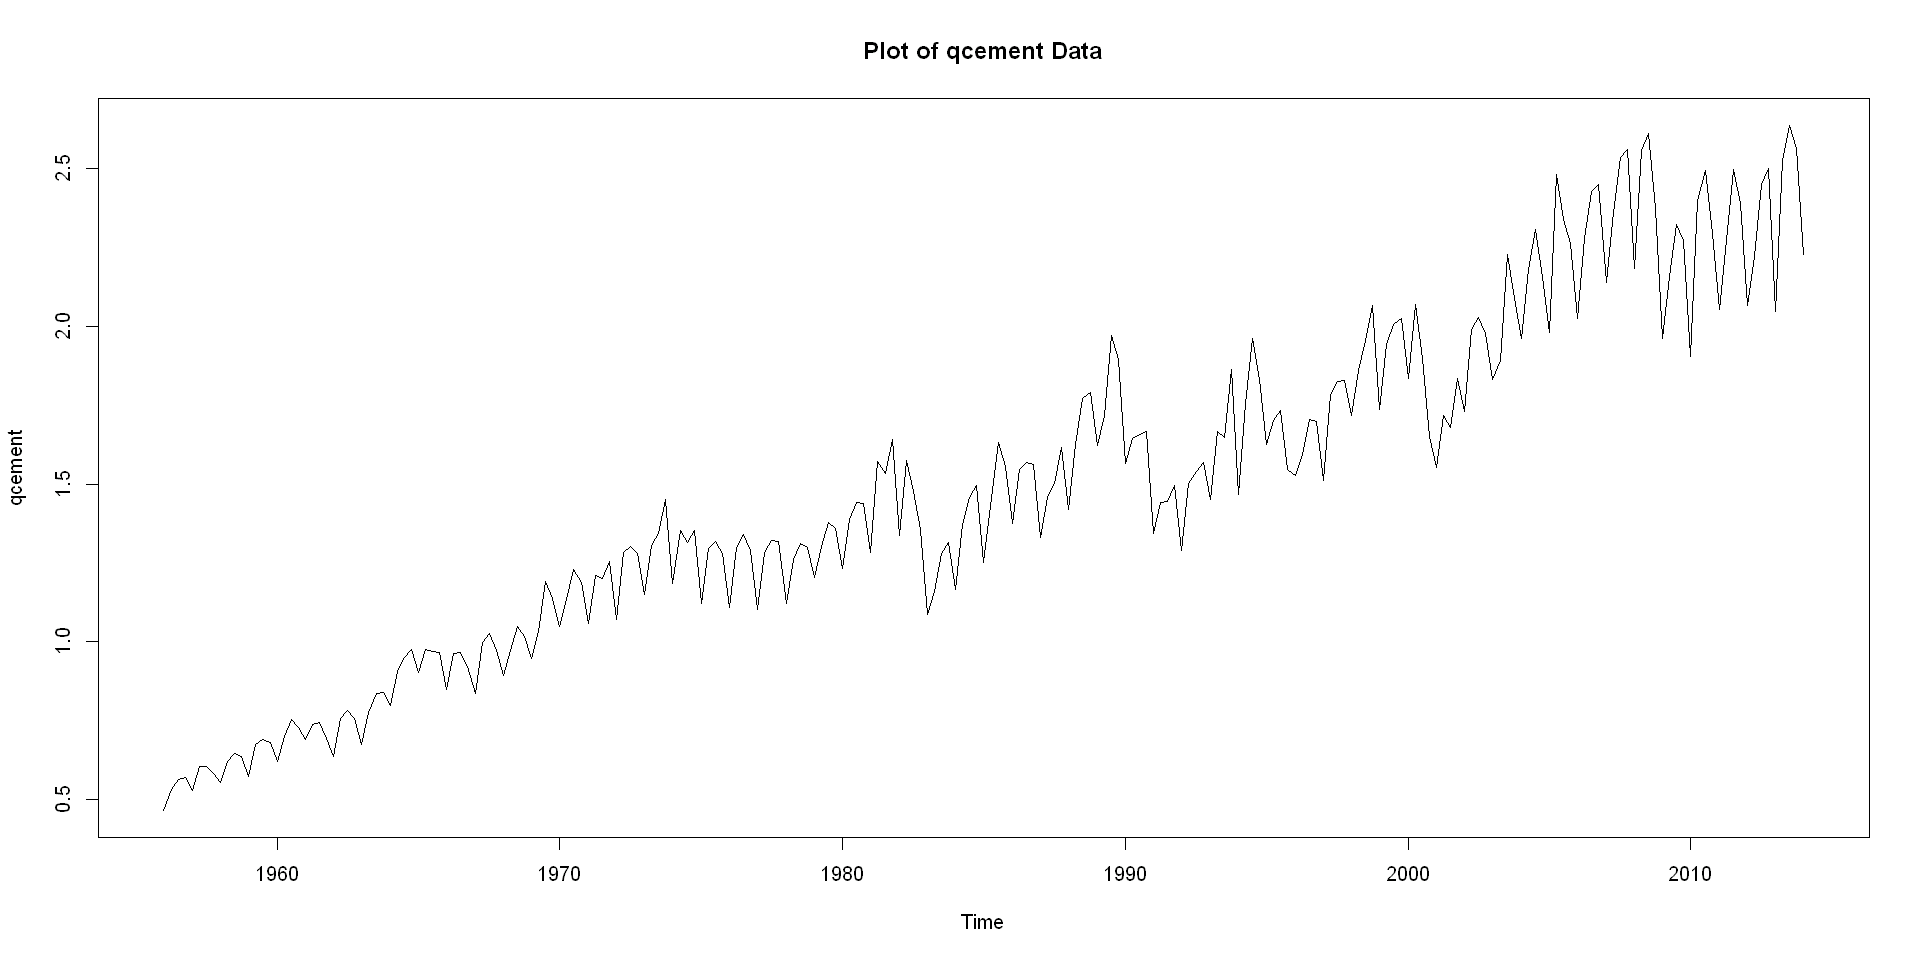

     Ozone             Temp      
 Min.   :  7.00   Min.   :63.00  
 1st Qu.: 21.00   1st Qu.:77.00  
 Median : 44.00   Median :82.00  
 Mean   : 49.48   Mean   :81.64  
 3rd Qu.: 76.00   3rd Qu.:86.00  
 Max.   :168.00   Max.   :97.00  
 NA's   :11                      

,Ozone,Temp
,<int>,<int>
62,135,84
63,49,85
64,32,81
66,64,83
67,40,83
68,77,88
69,97,92
70,97,92
71,85,89


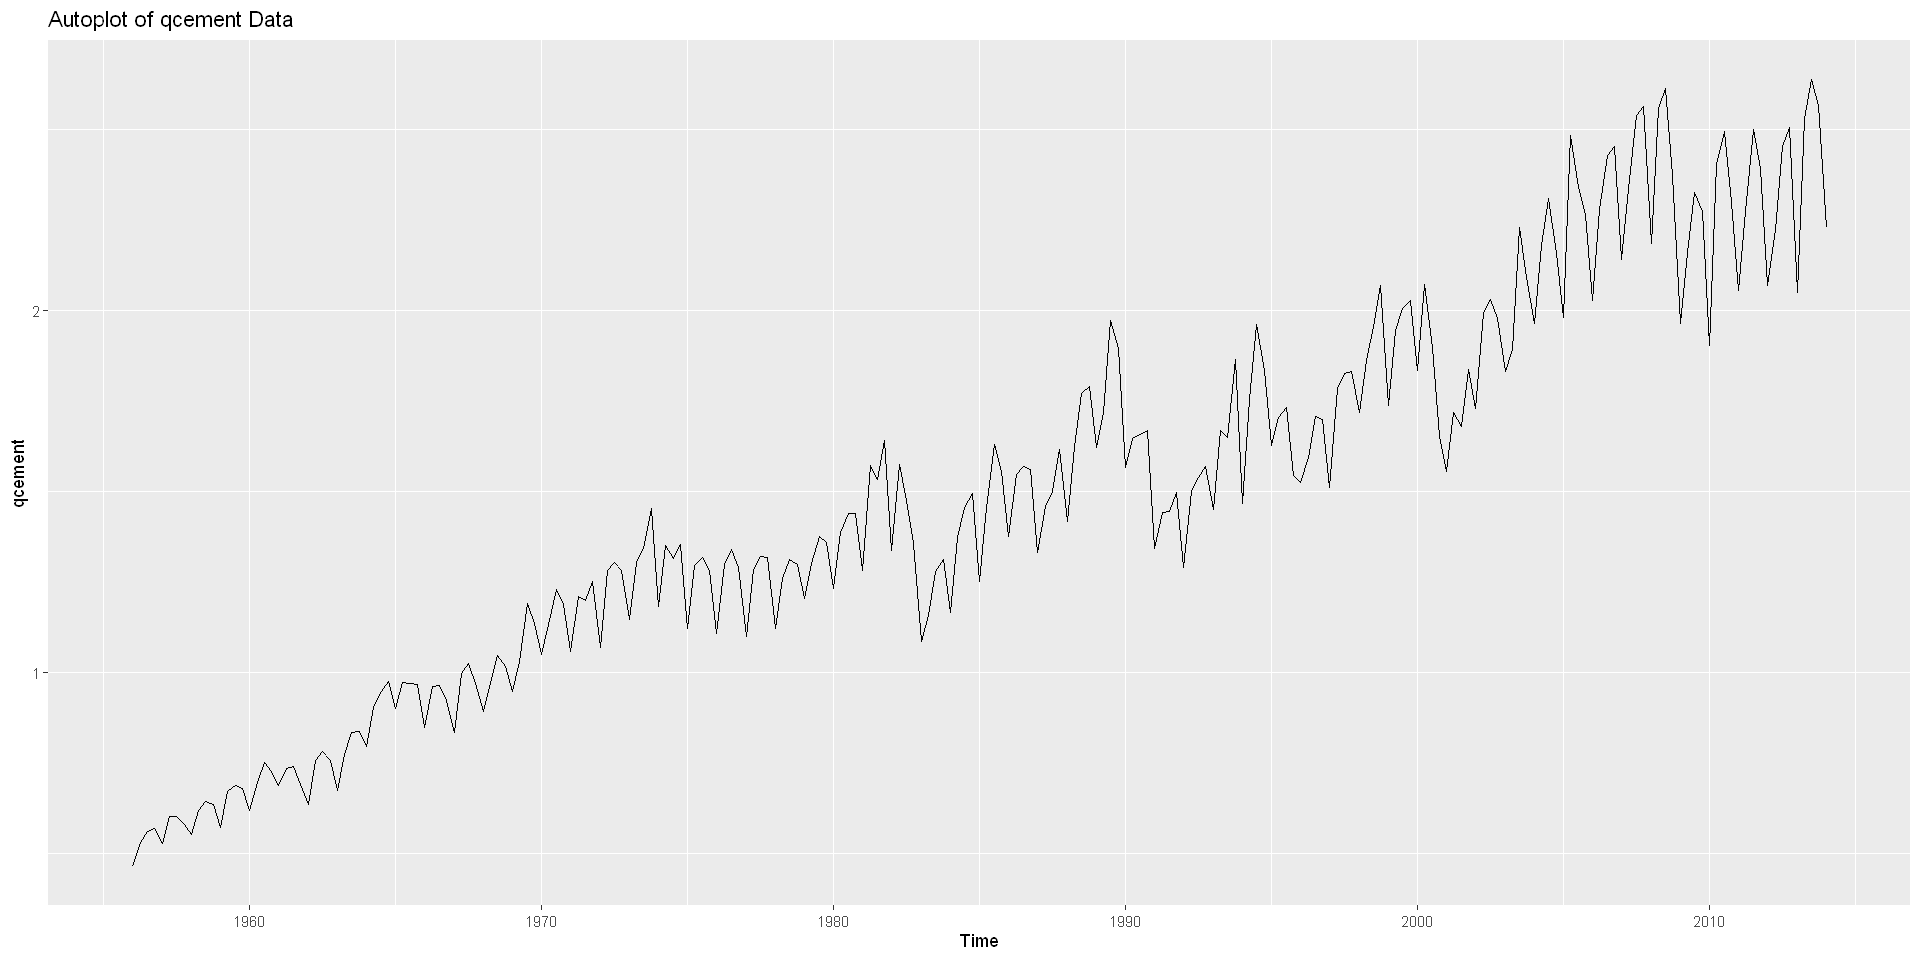

     Japan               NZ               UK               US        
 Min.   :  9.321   Min.   : 37.04   Min.   : 19.89   Min.   : 23.72  
 1st Qu.: 74.135   1st Qu.: 96.52   1st Qu.: 53.89   1st Qu.: 63.95  
 Median :135.461   Median :154.54   Median : 95.56   Median : 85.88  
 Mean   :122.080   Mean   :170.59   Mean   :106.86   Mean   : 84.85  
 3rd Qu.:176.752   3rd Qu.:228.60   3rd Qu.:128.13   3rd Qu.:108.98  
 Max.   :227.641   Max.   :330.81   Max.   :269.29   Max.   :136.09  

[1] "Start: 1981" "Start: 1"   
[1] "End: 2012" "End: 3"   
[1] "Frequency: 4"


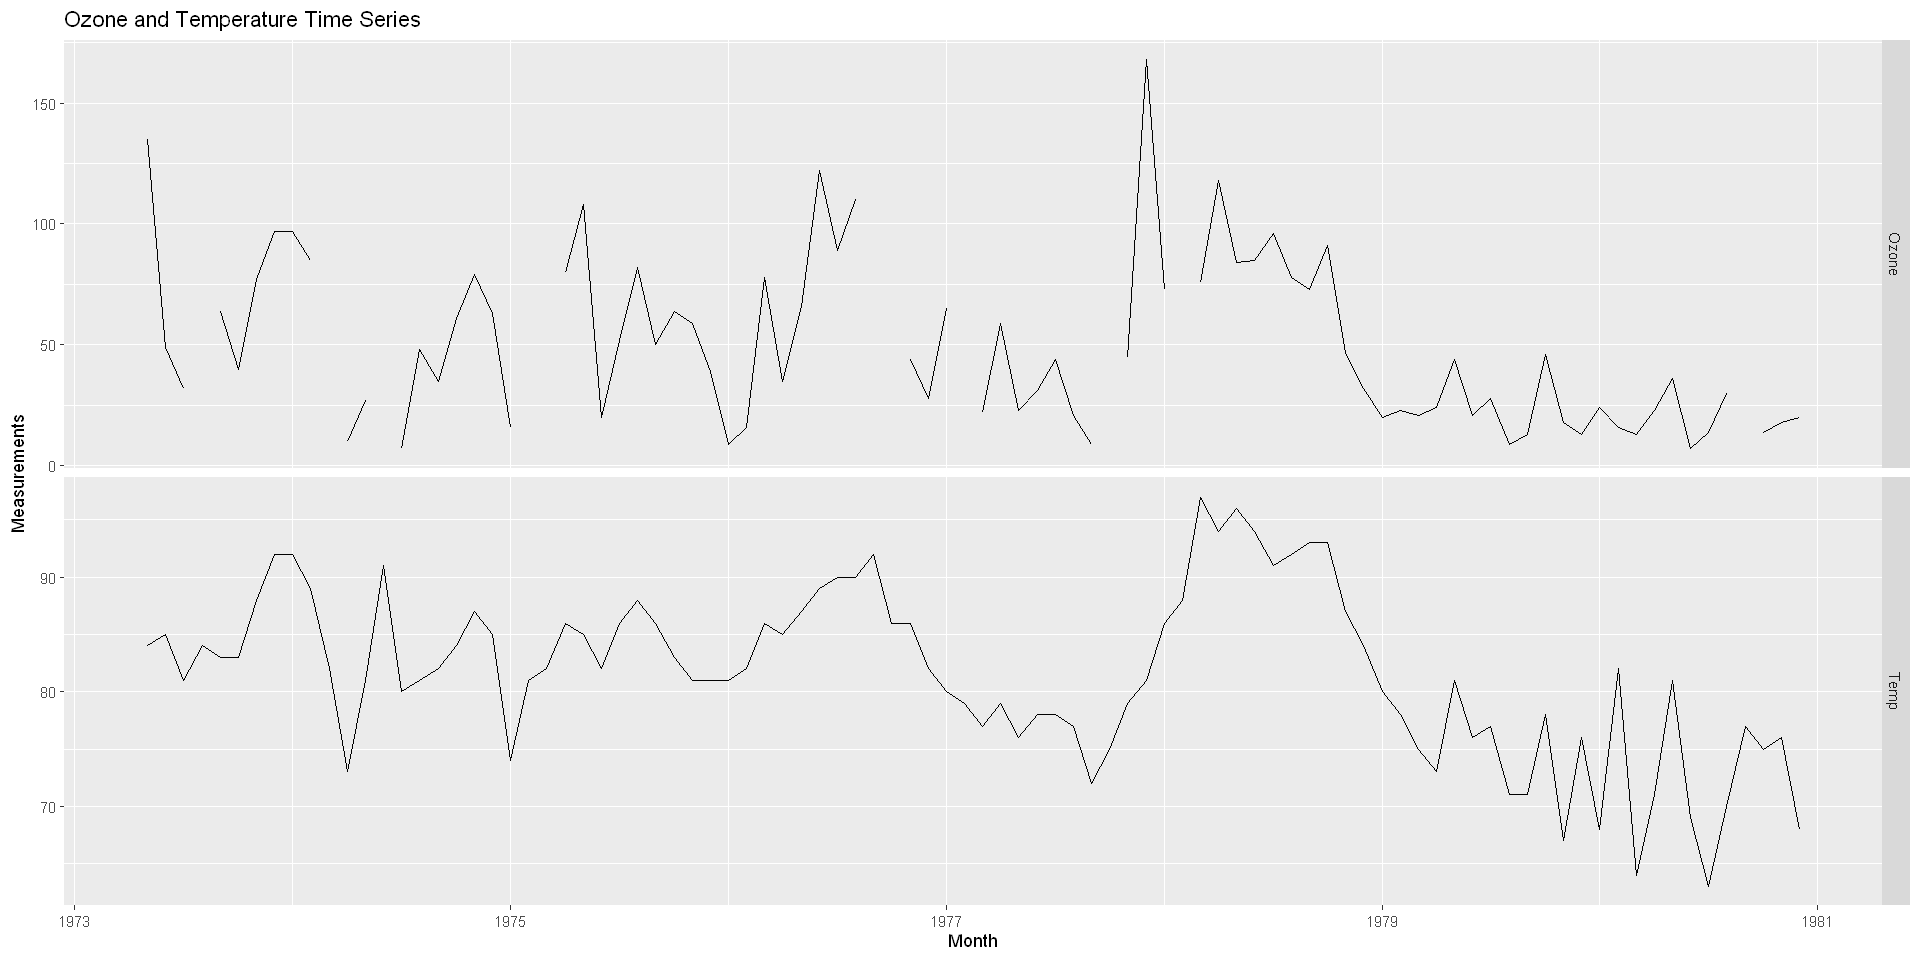

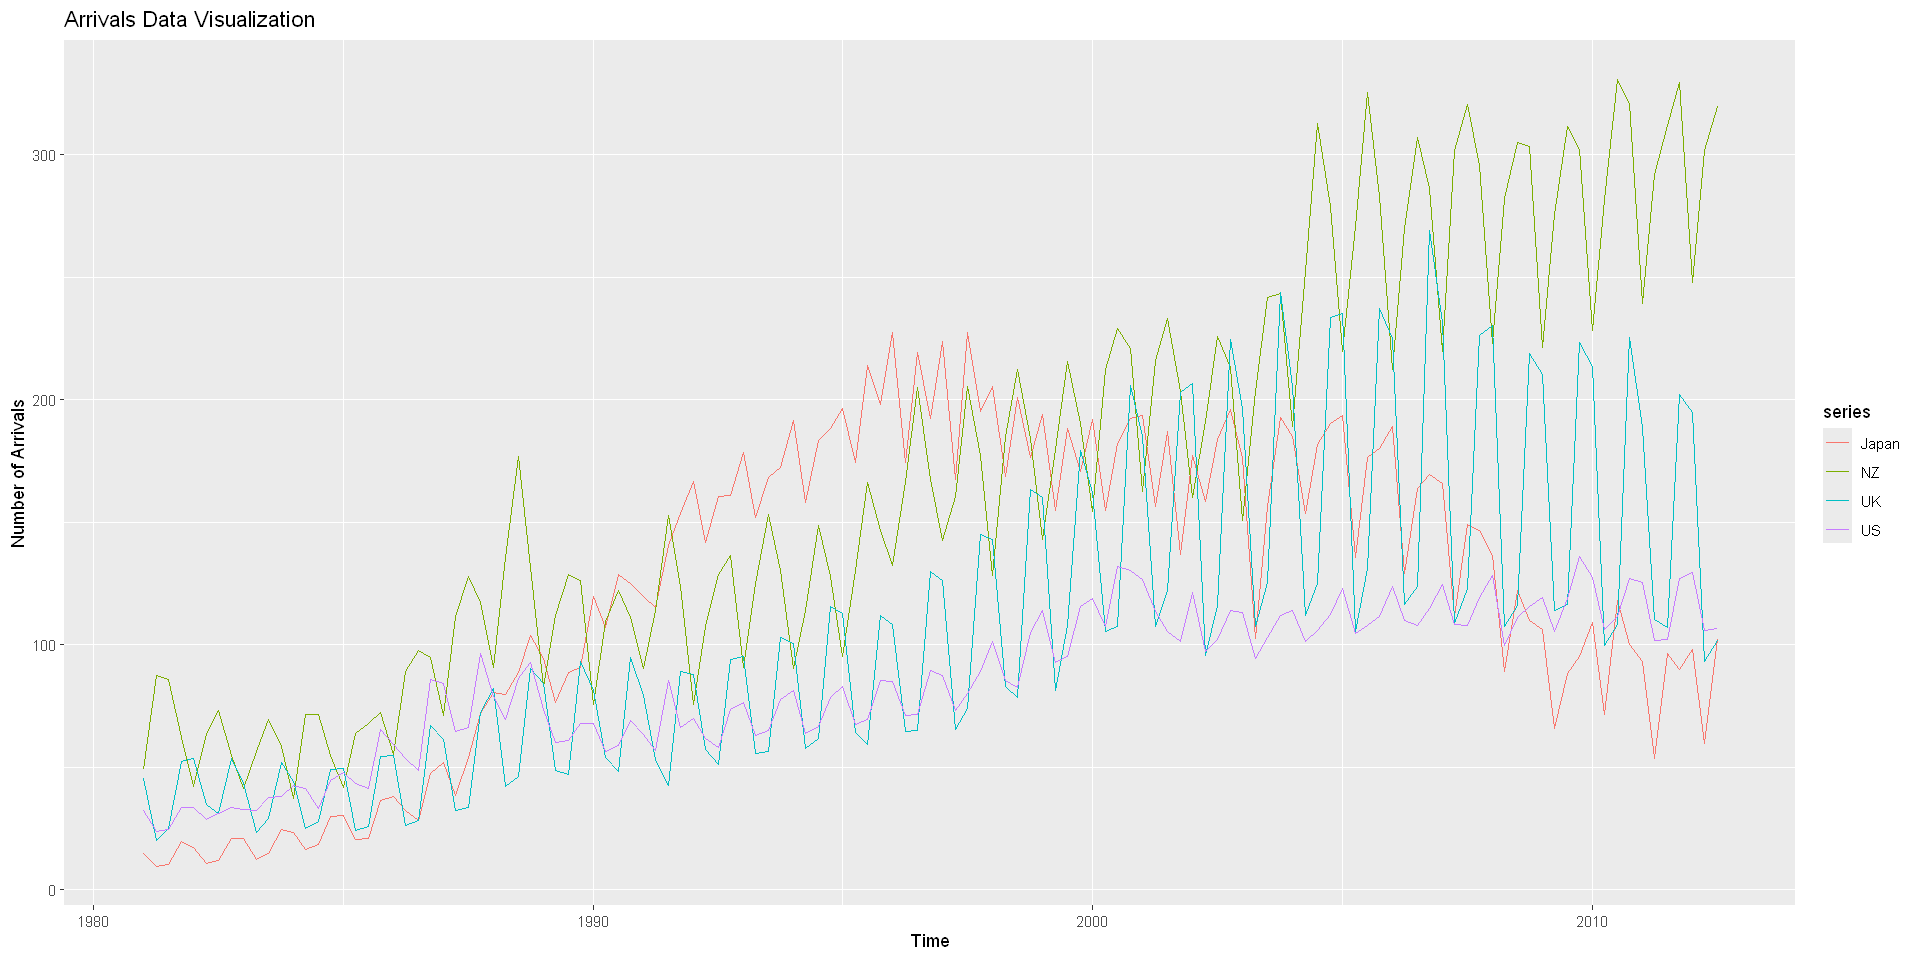

In [2]:
# Ustawienie szerokości okna wykresu
options(repr.plot.width = 16, repr.plot.height = 8)

# 1. Dla danych qcement (pakiet fpp2) sprawdź informacje o danych
data(qcement, package = "fpp2")
summary(qcement)
plot(qcement, main="Plot of qcement Data")
autoplot(qcement) + ggtitle("Autoplot of qcement Data")

# 2. Przetwarzanie danych airquality
data("airquality")
ozone_airquality <- airquality[62:153, c("Ozone", "Temp")]
summary(ozone_airquality)
na.omit(ozone_airquality)  # Czyszczenie danych
ozonet_ts <- ts(ozone_airquality, start=c(1973, 5), frequency=12)  # Ustawienie szeregu czasowego
autoplot(ozonet_ts, facets=TRUE) +
  ggtitle("Ozone and Temperature Time Series") +
  xlab("Month") +
  ylab("Measurements")

# 3. Analiza i wizualizacja danych arrivals z pakietu fpp2
data(arrivals, package = "fpp2")
summary(arrivals)
print(paste("Start:", start(arrivals)))
print(paste("End:", end(arrivals)))
print(paste("Frequency:", frequency(arrivals)))
autoplot(arrivals) +
  ggtitle("Arrivals Data Visualization") +
  xlab("Time") +
  ylab("Number of Arrivals")


## Zadanie 2

1. Dla danych `qcement` oraz `ozonet_airquality` wykonaj wykresy autokorelacji i autokorelacji częściowej. Sprawdź jaką wartość ACF jest dla 10 opóźnienia oraz PACF dla 20 opóźnienia. Wykonaj wykresy autokorelacji i autokorelacji częściowych dla max. opóźnienia wynoszącego 30. Wykonaj wykresy sezonowości (3 dla każdej zmiennej) z pakietu `forecast`.

2. Wykonaj symulację 3 szeregów czasowych:
   - ma, o parametrze -0.9 i wartości średniej wynoszącej 5, liczba wygenerowanych obserwacji 200,
   - ar, o parametrze 0.9 i wartości średniej wynoszącej -1, liczba wygenerowanych obserwacji 200,
   - błądzenie przypadkowe, liczba wygenerowanych obserwacji 200.

3. Dla danych `visnights`, atrybuty 1:5 wykonaj analizę danych wraz z wizualizacją. Sprawdź typ danych, ich zakres, występowanie braków danych. Wykonaj wykresy liniowe, ACF, PACF, sezonowości.


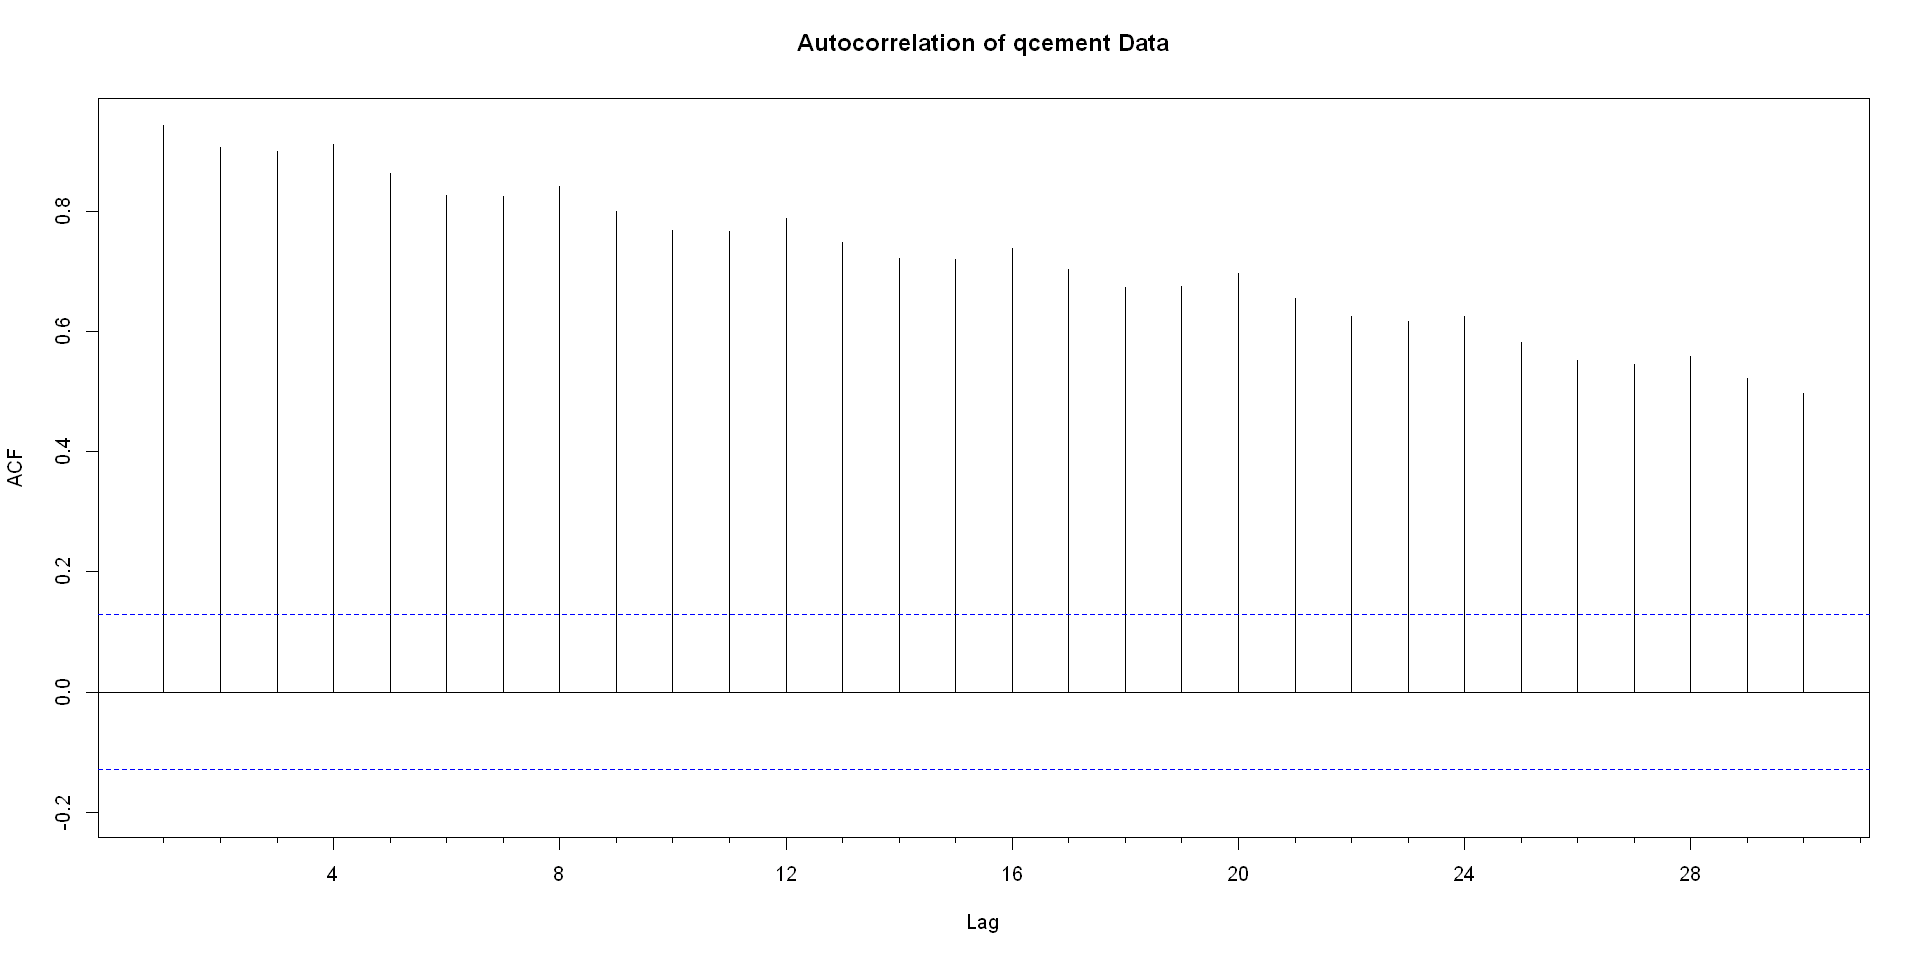

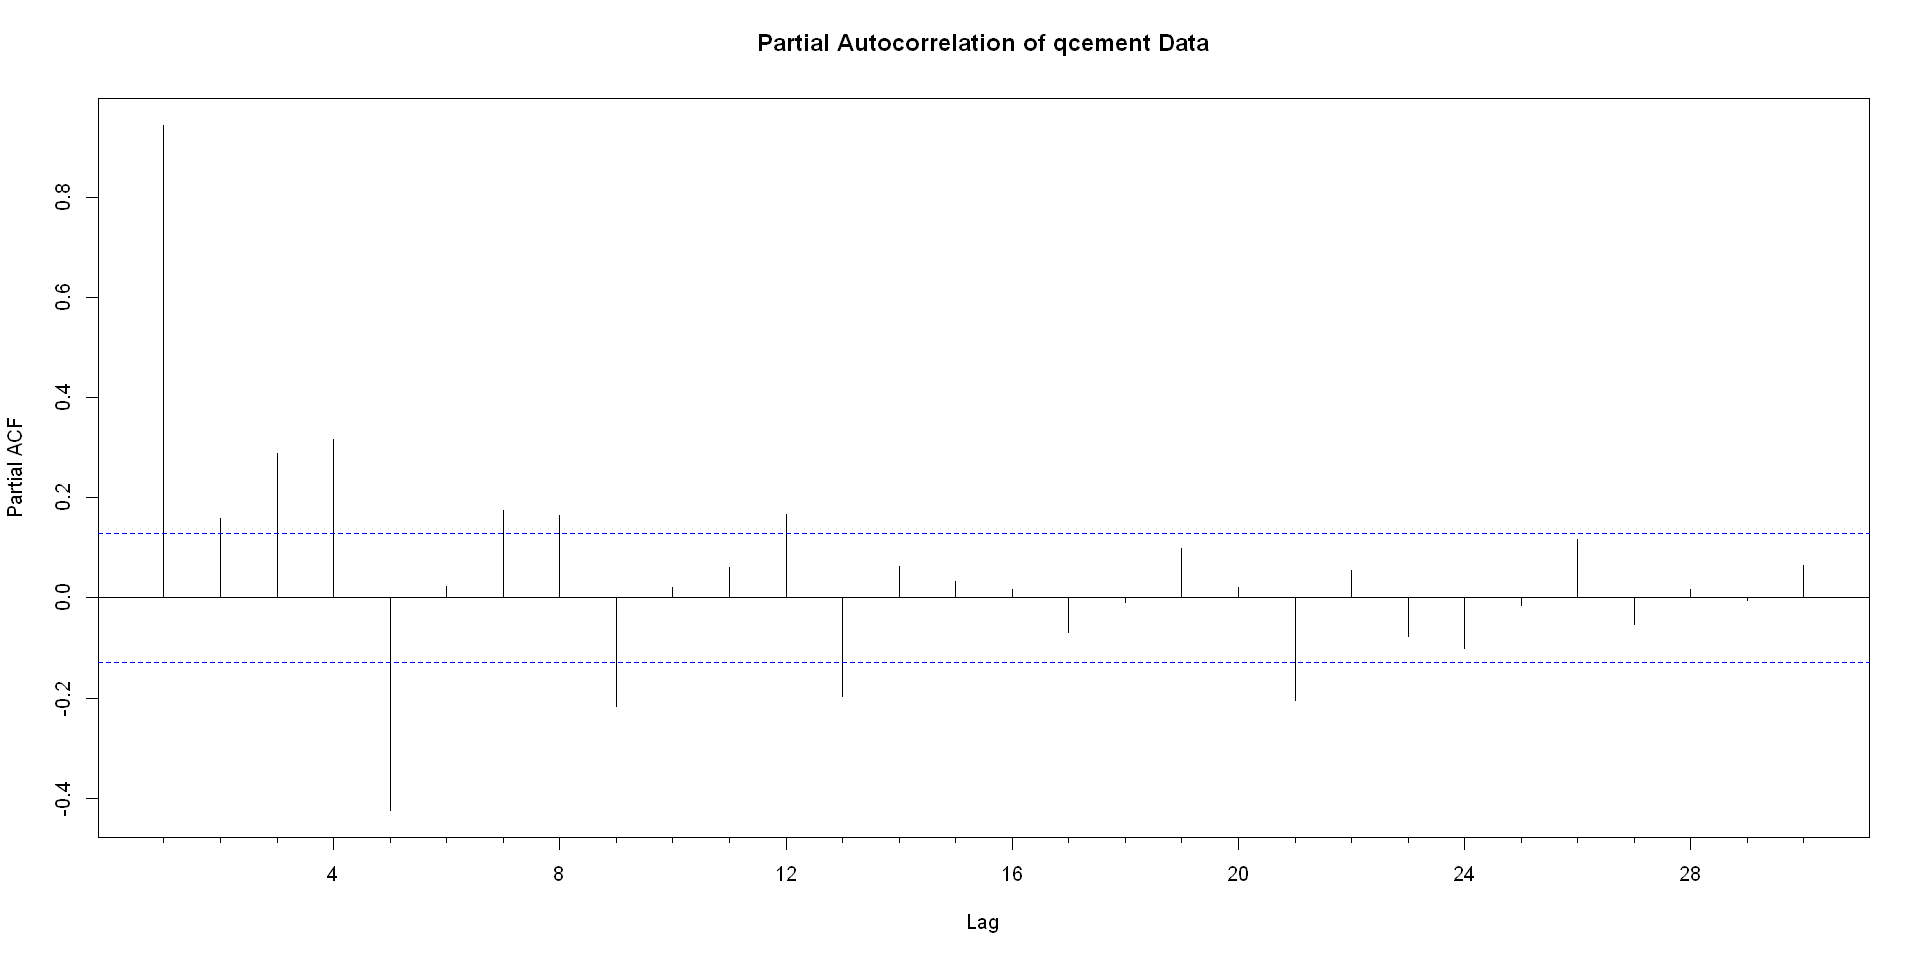

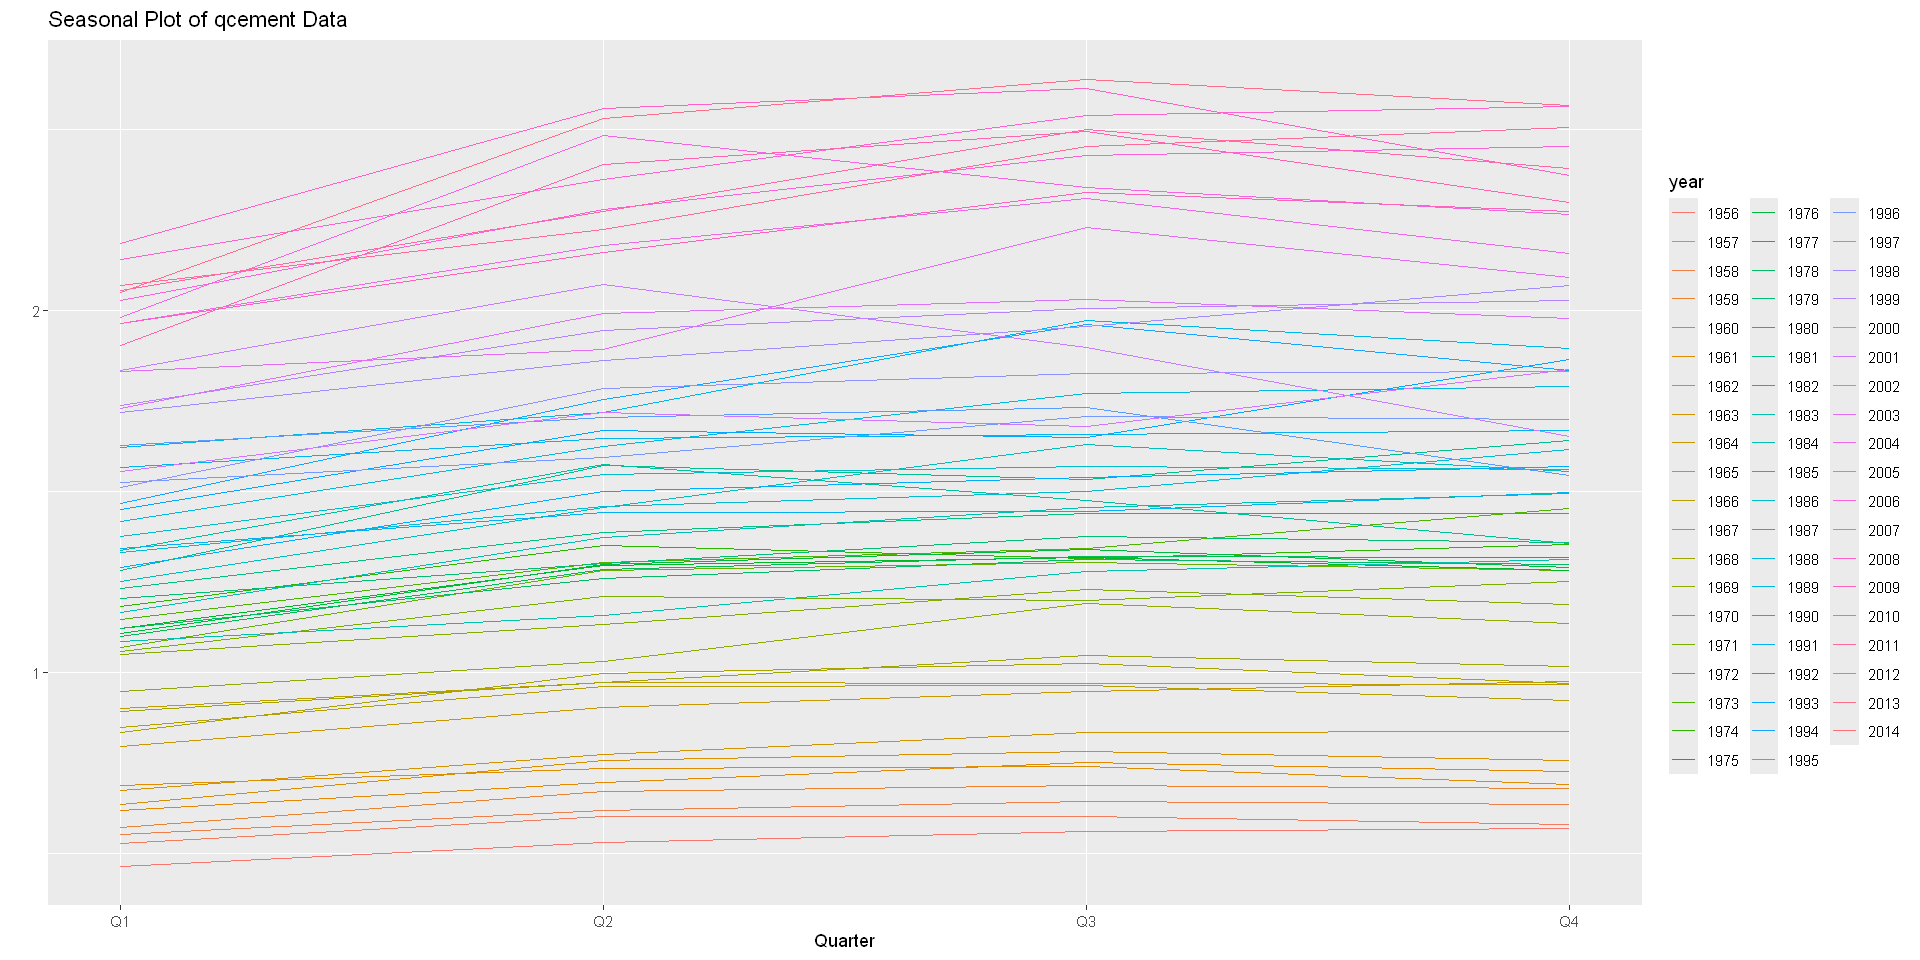

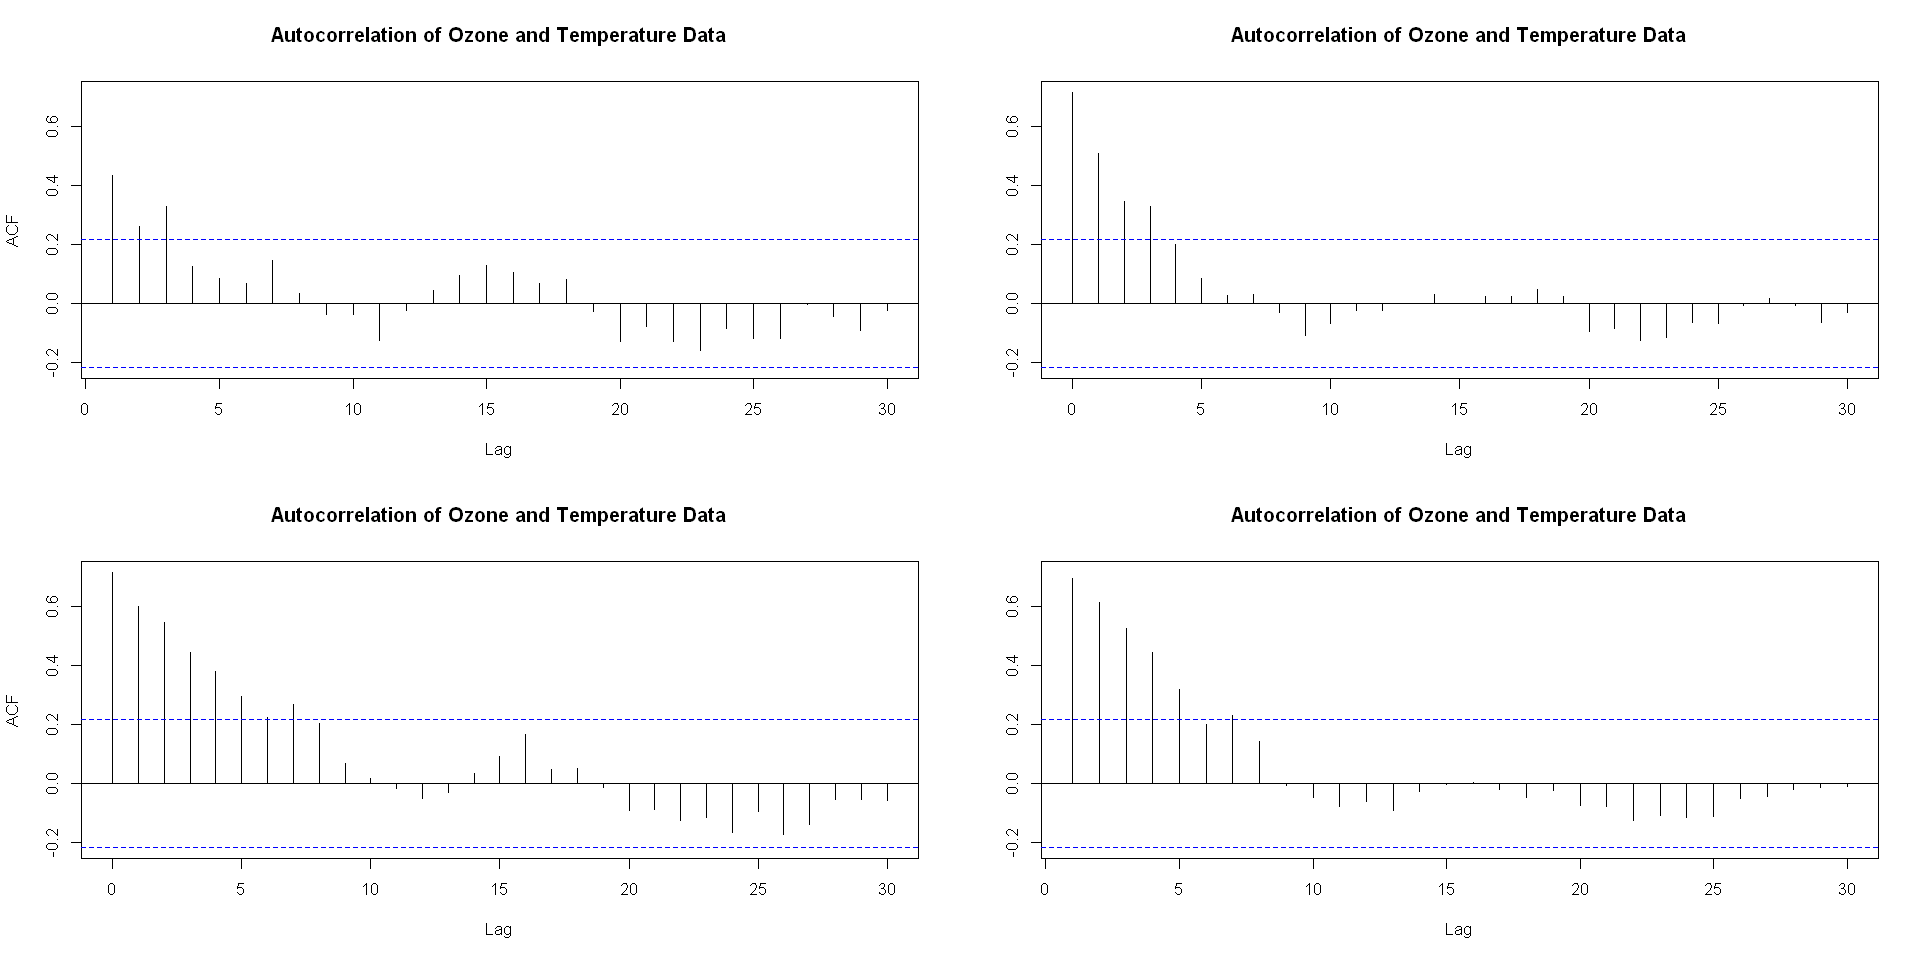

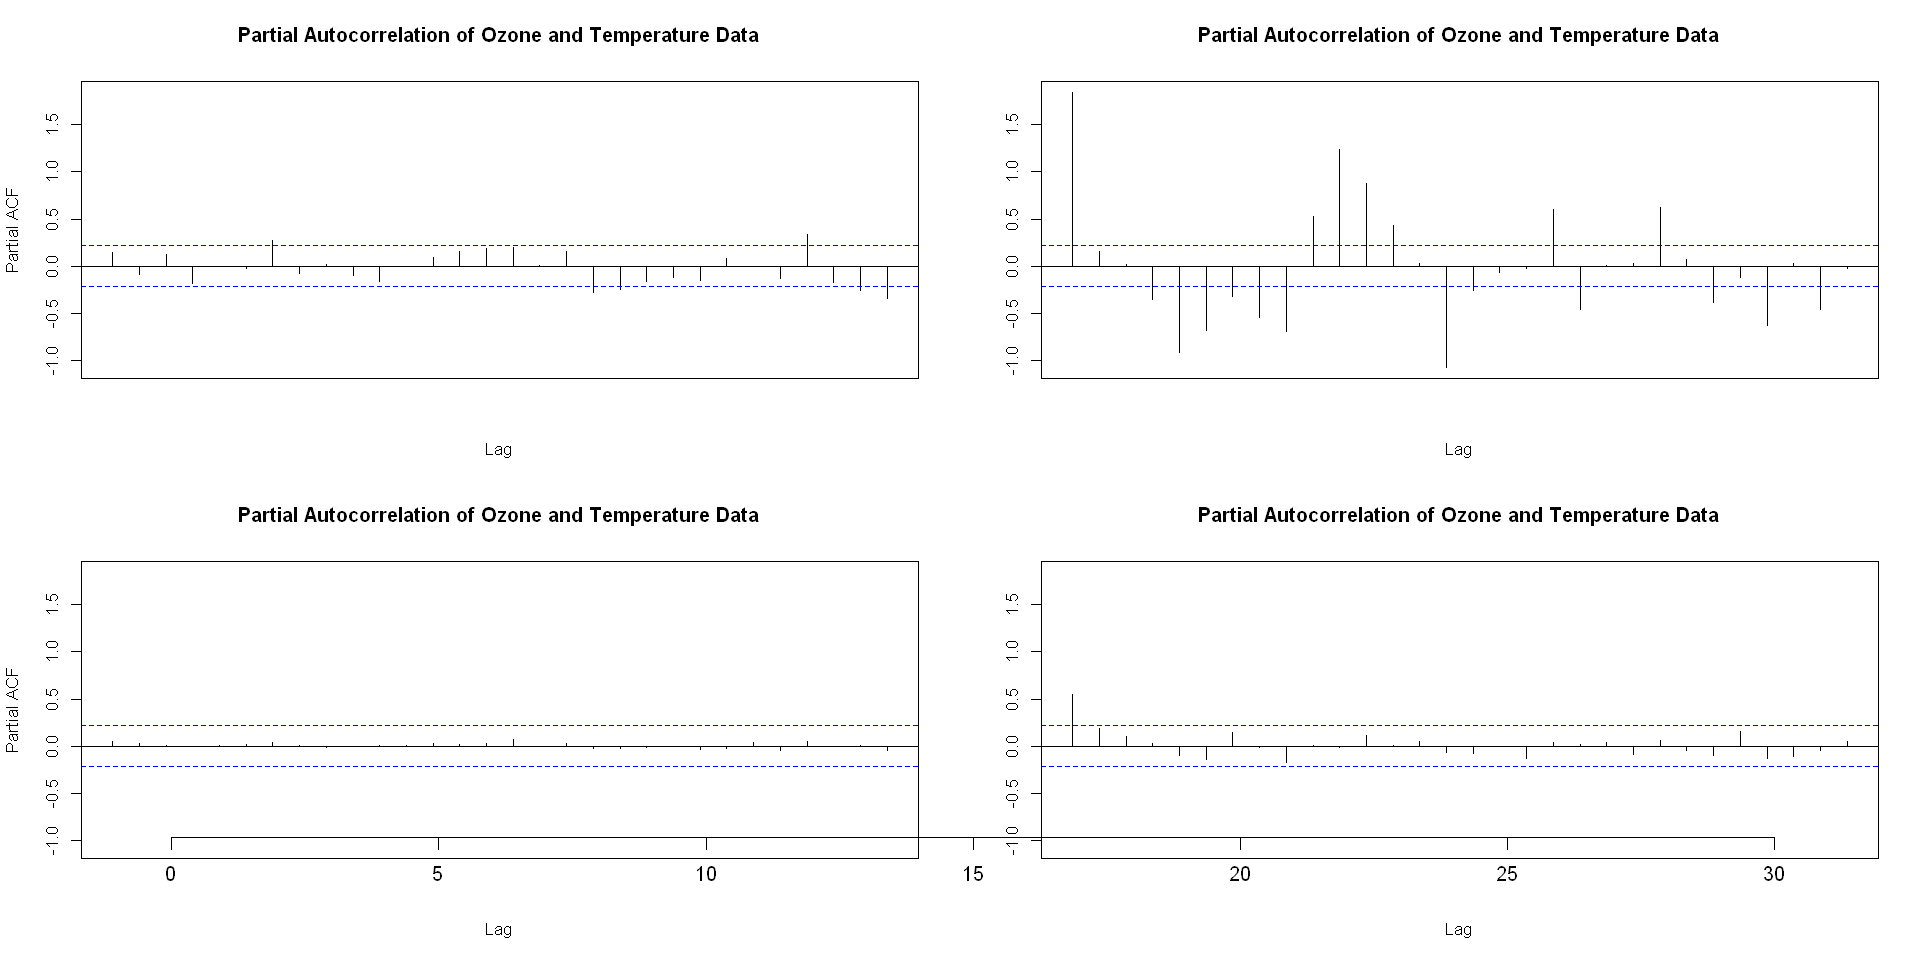

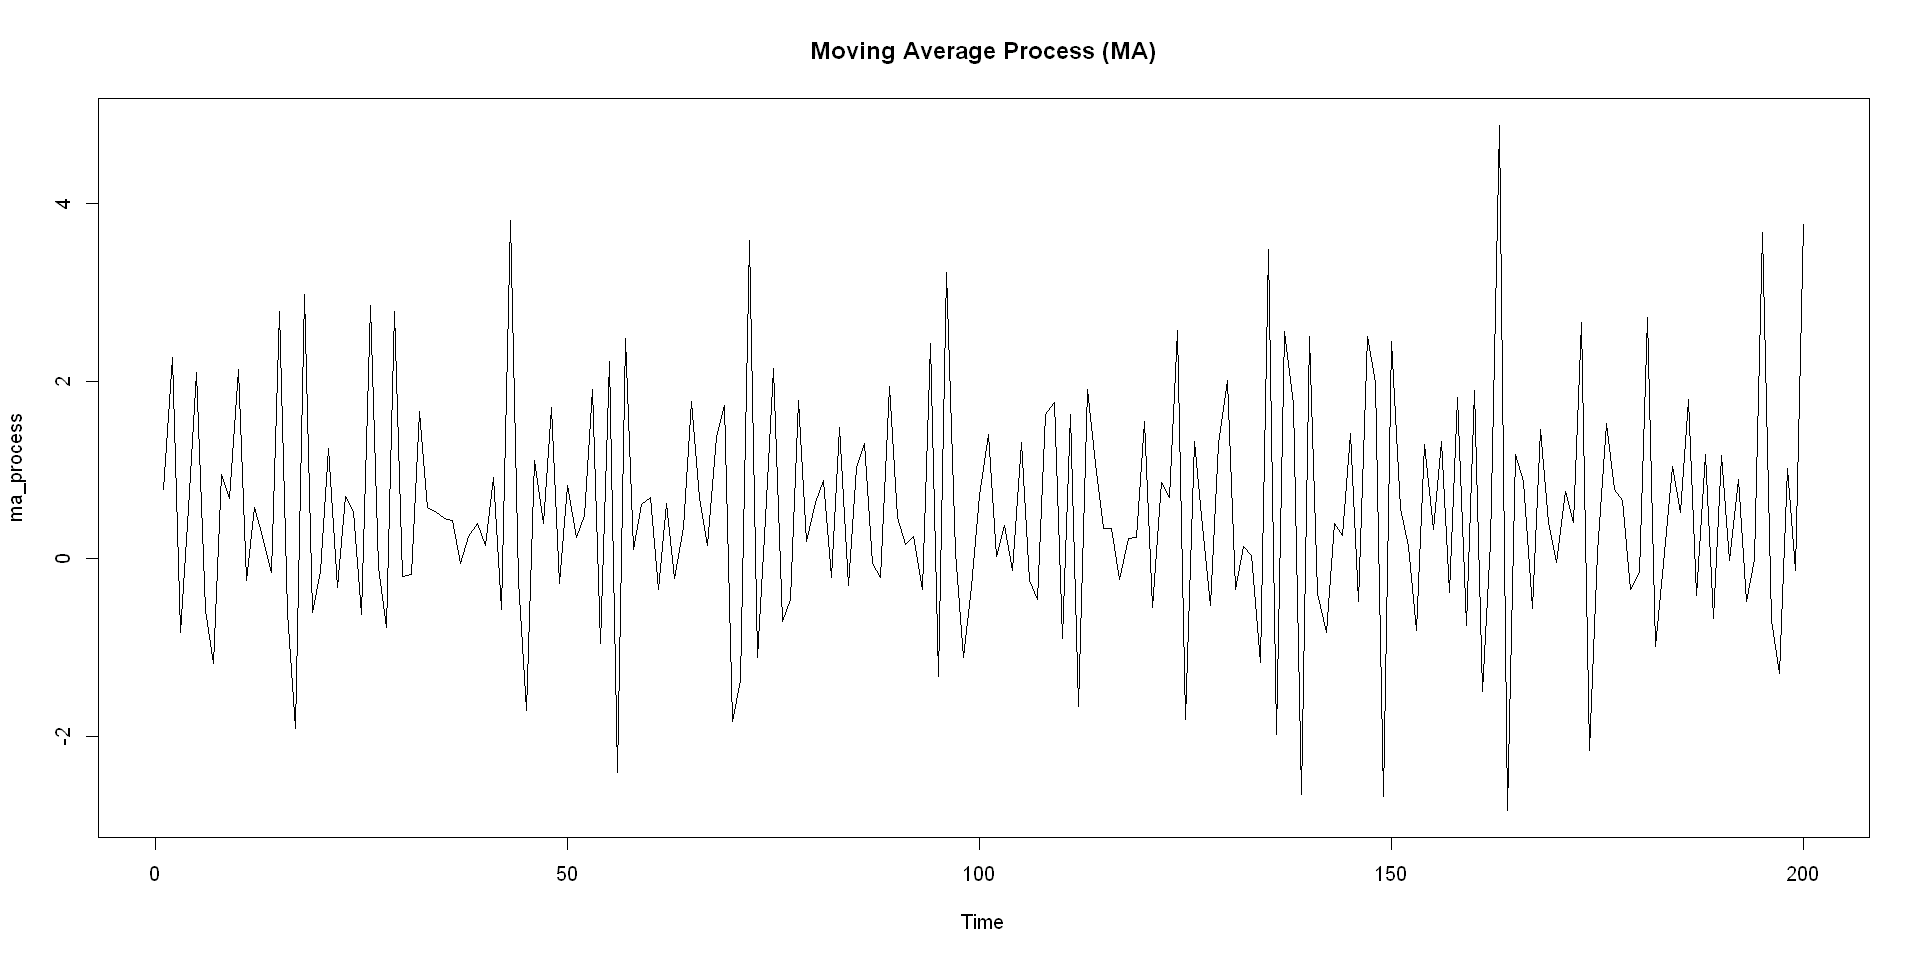

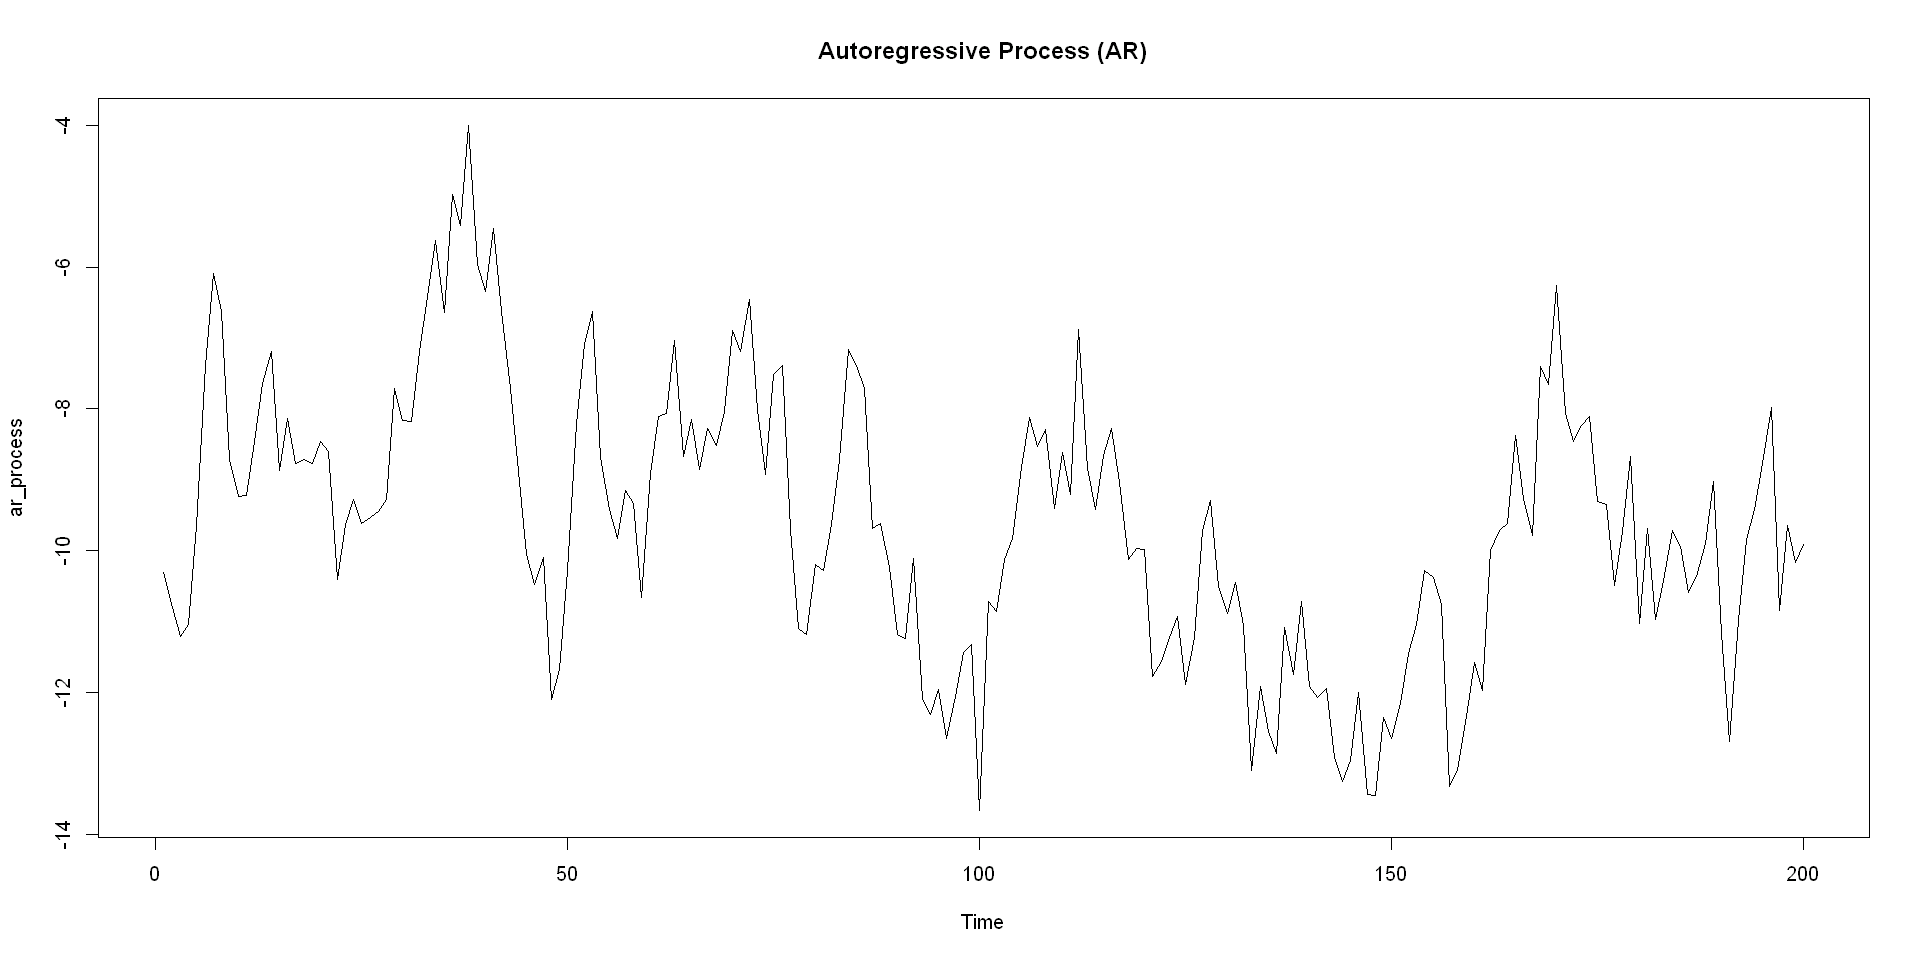

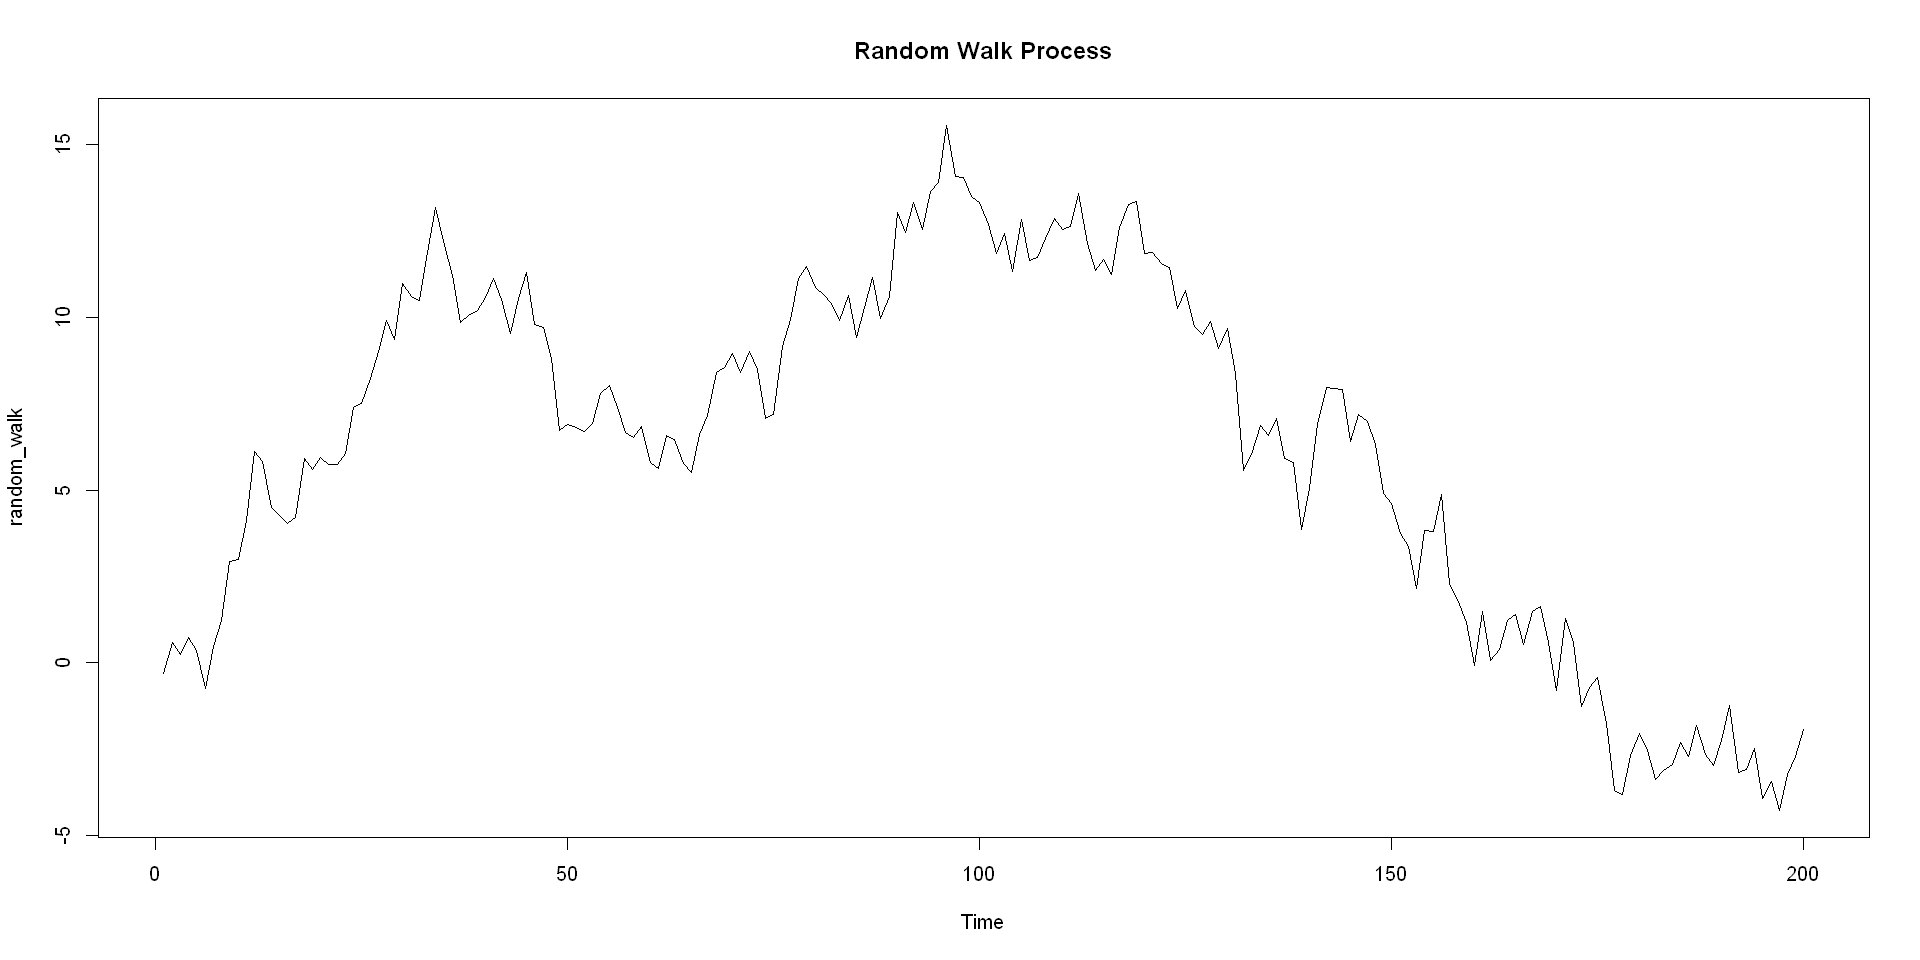

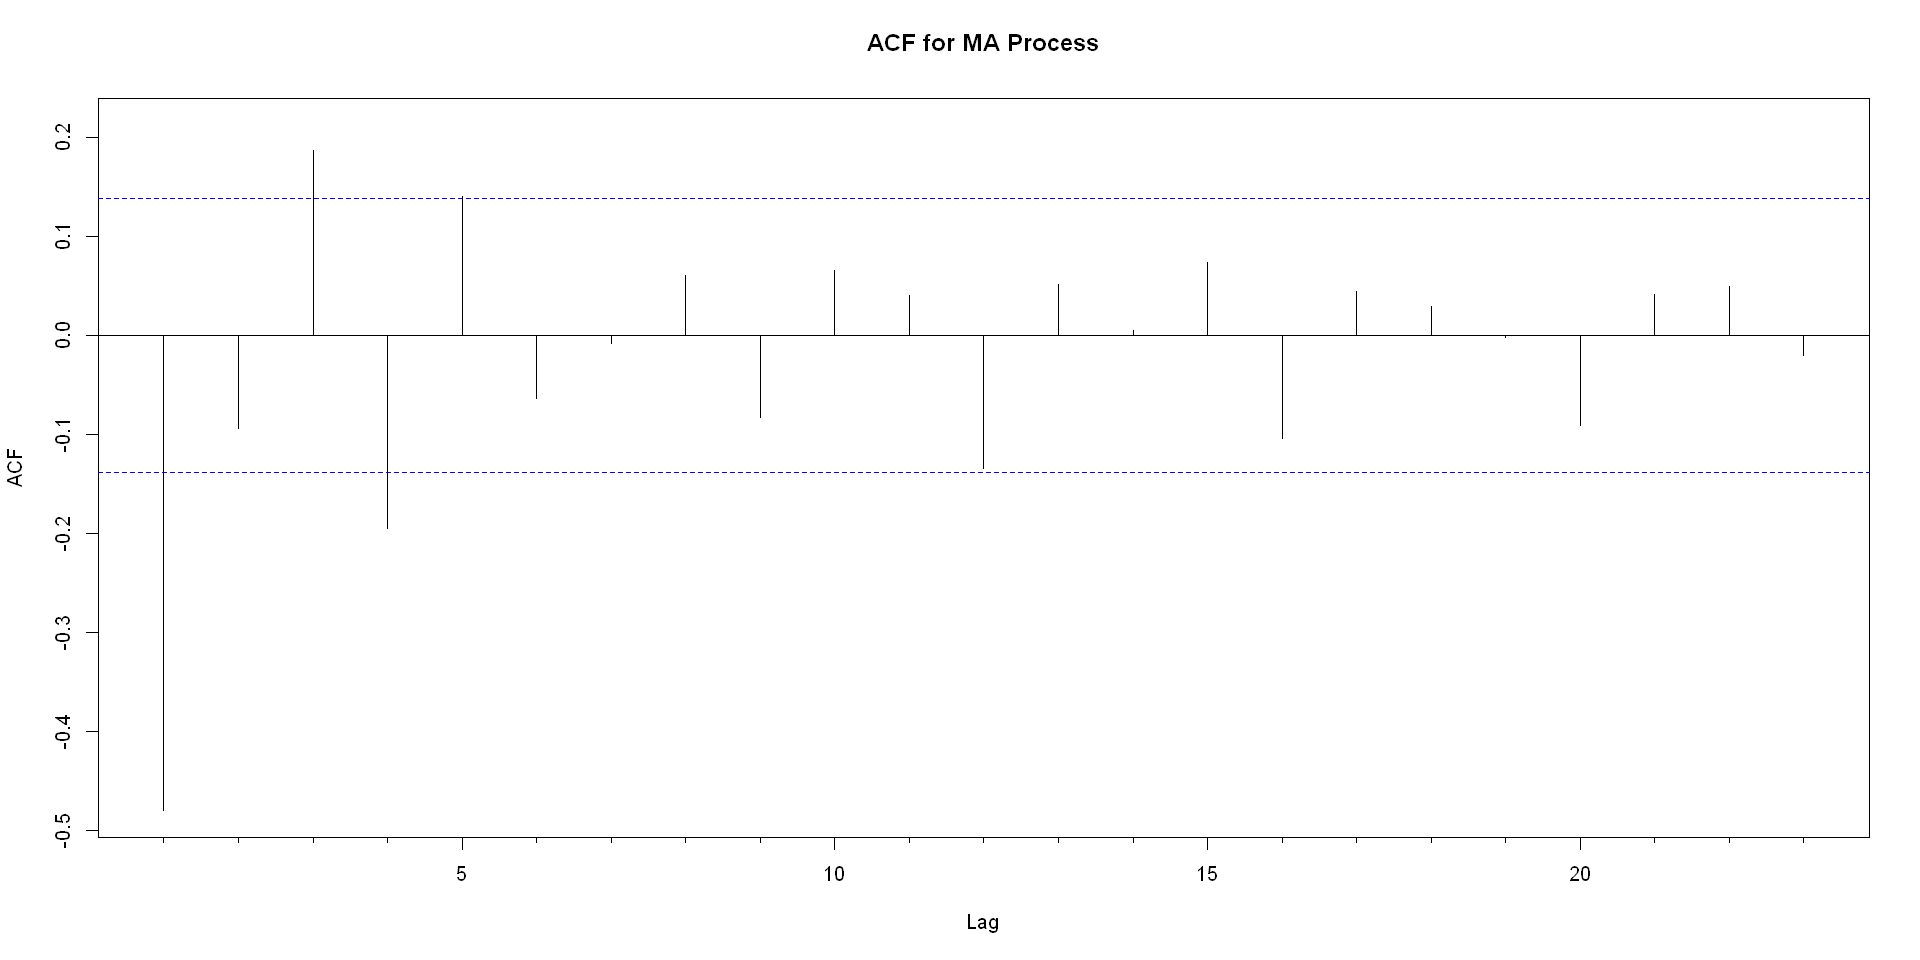

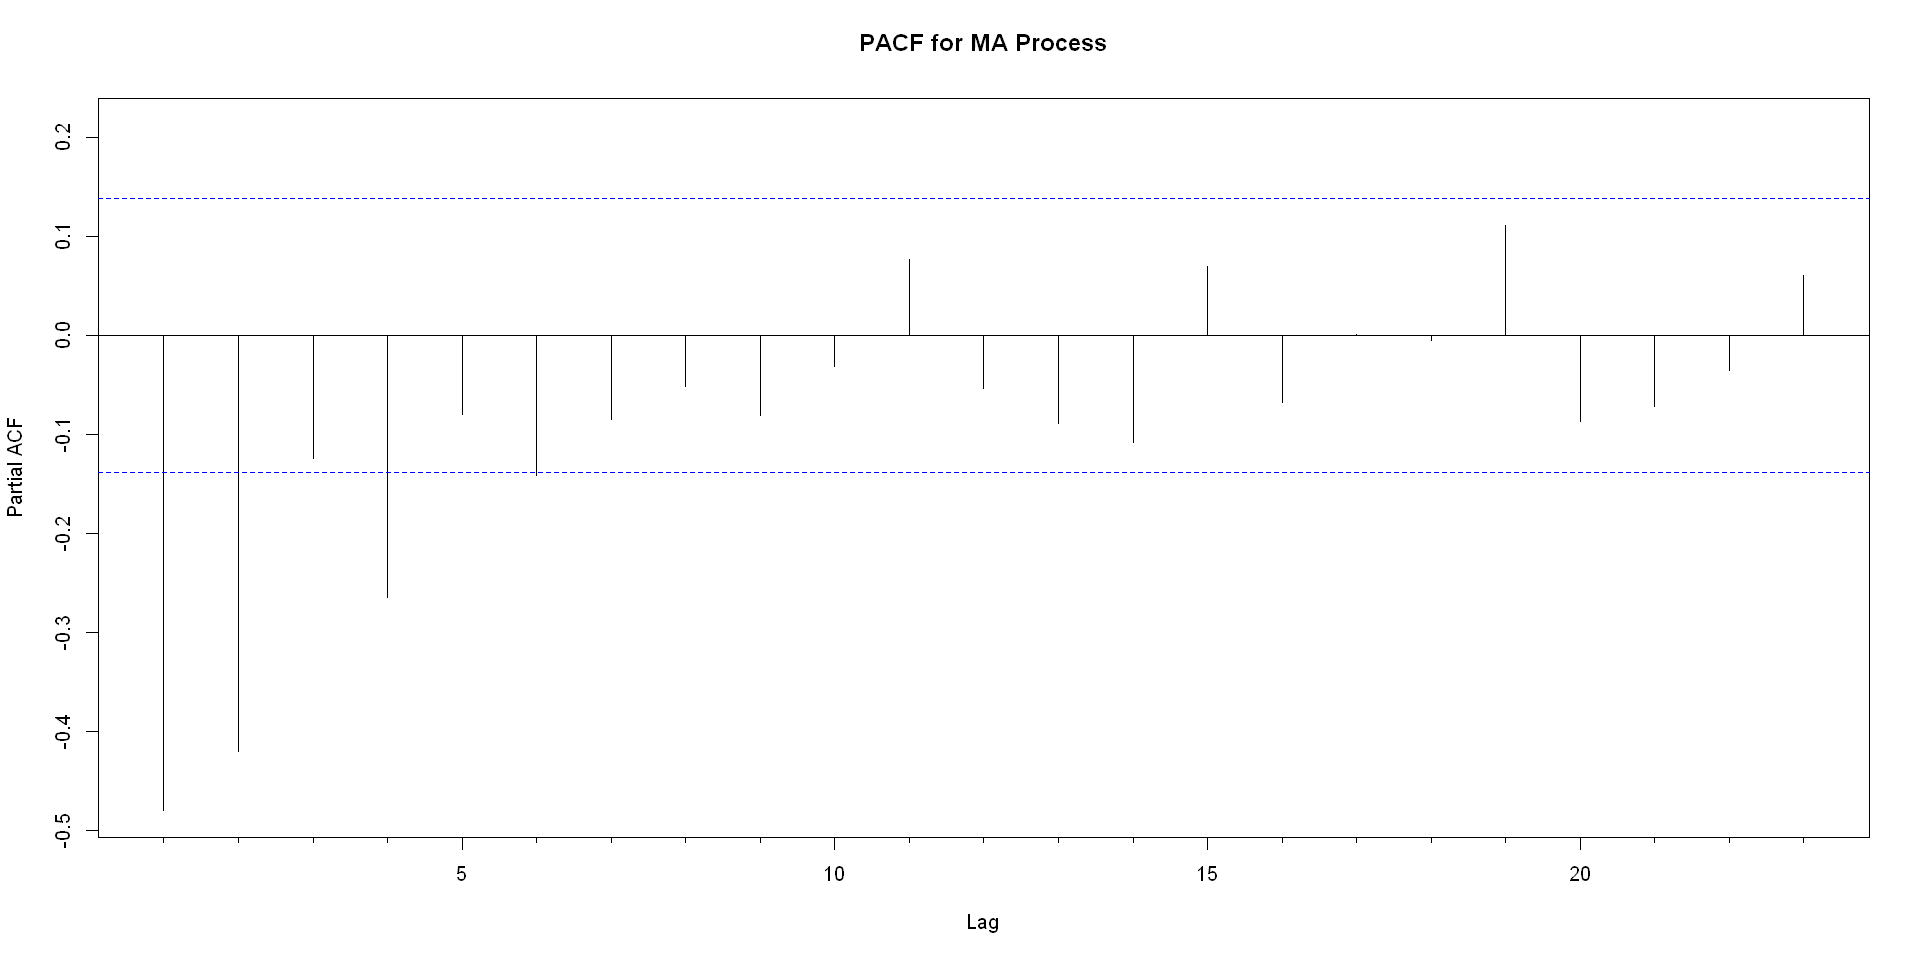

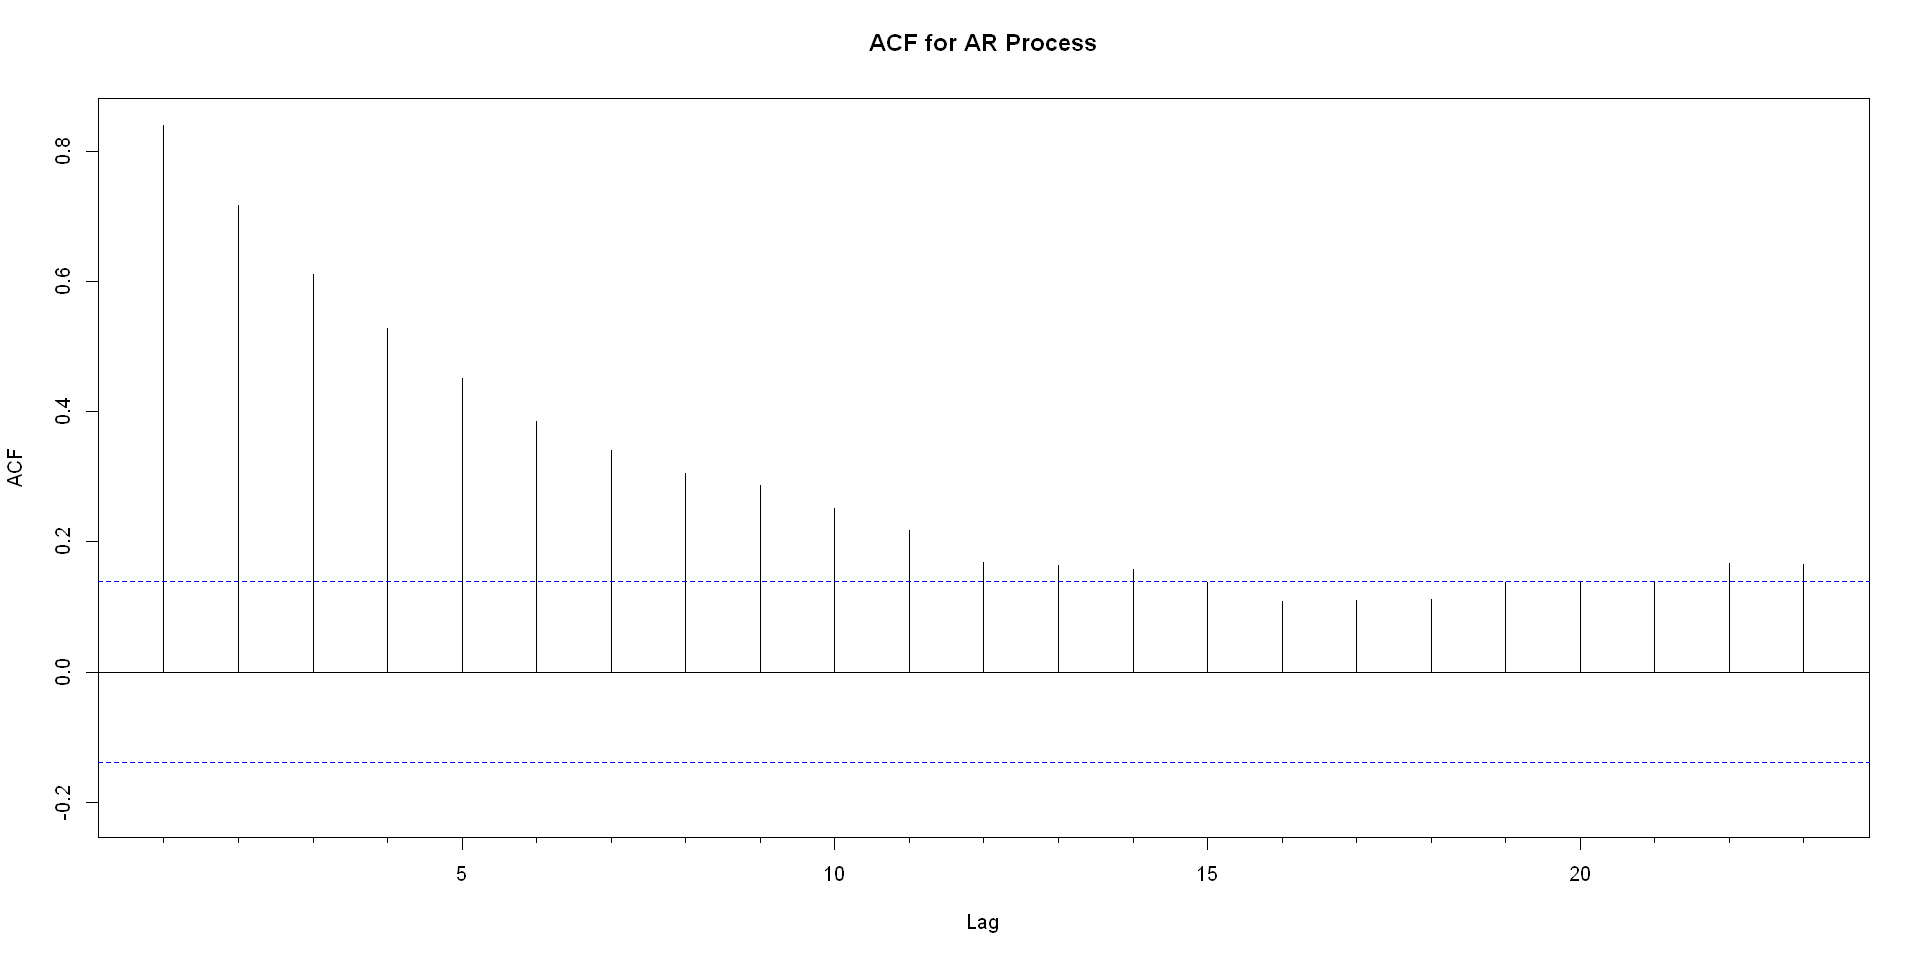

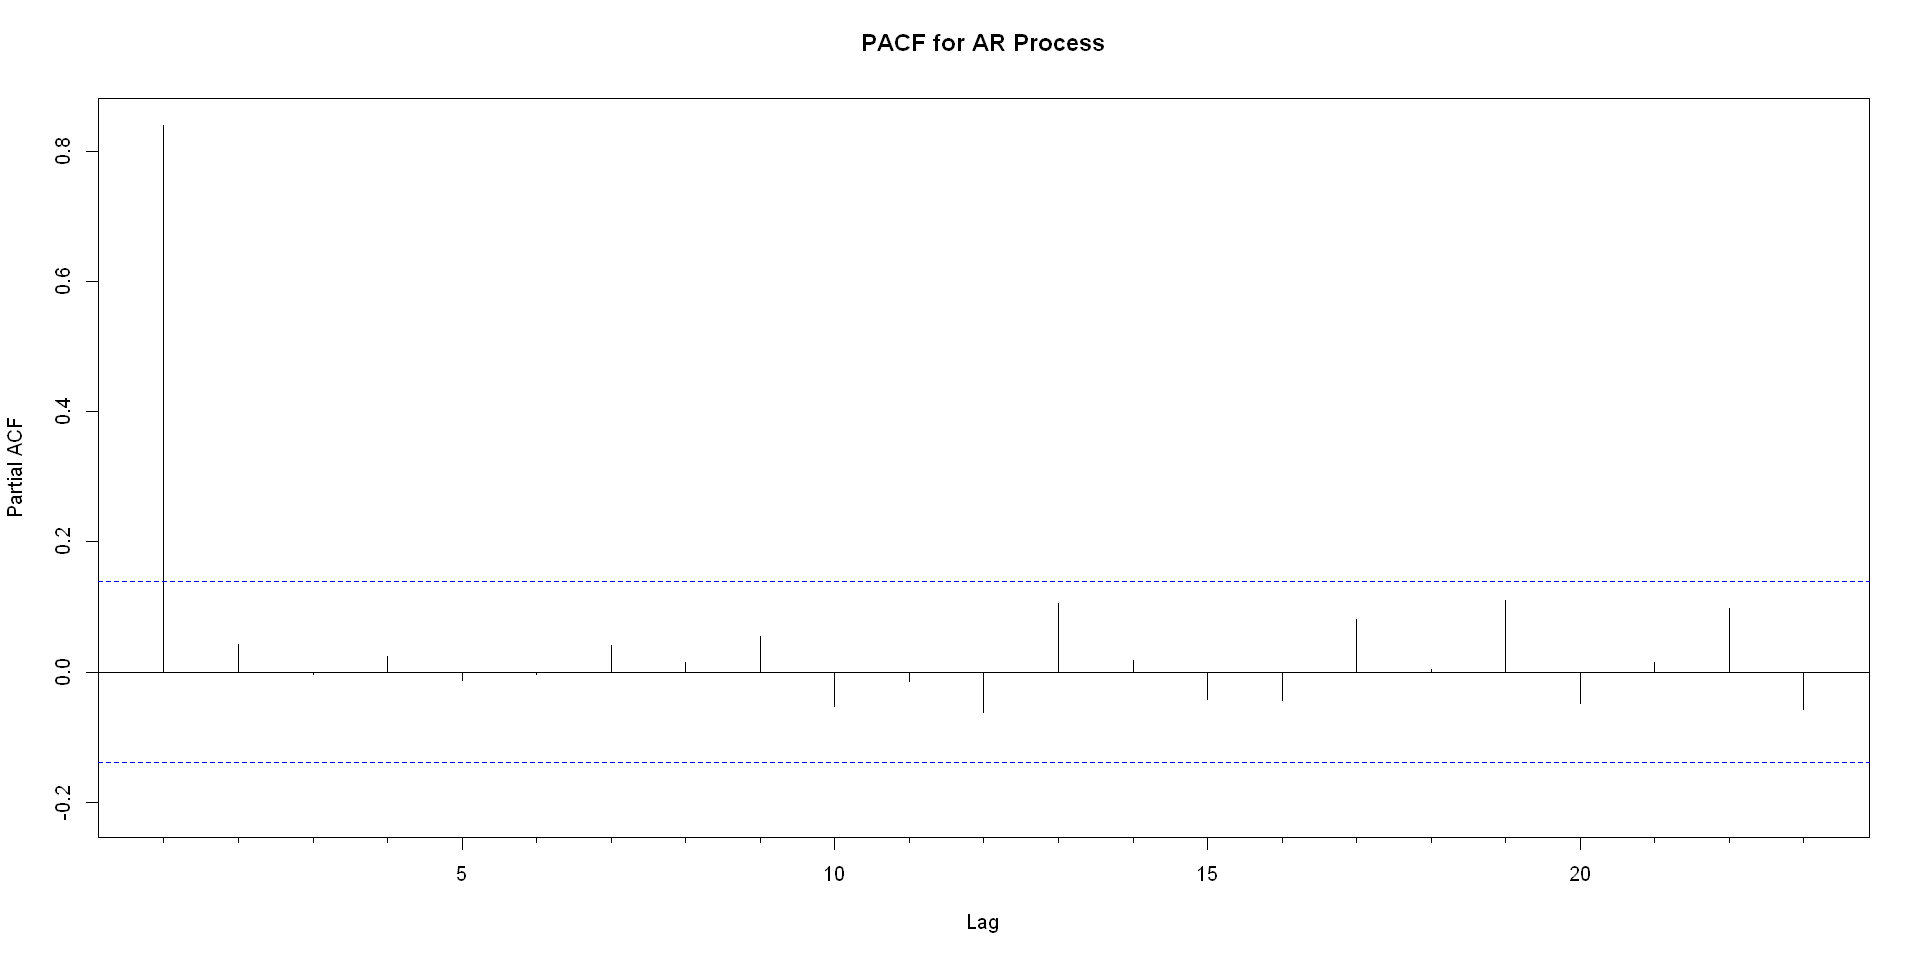

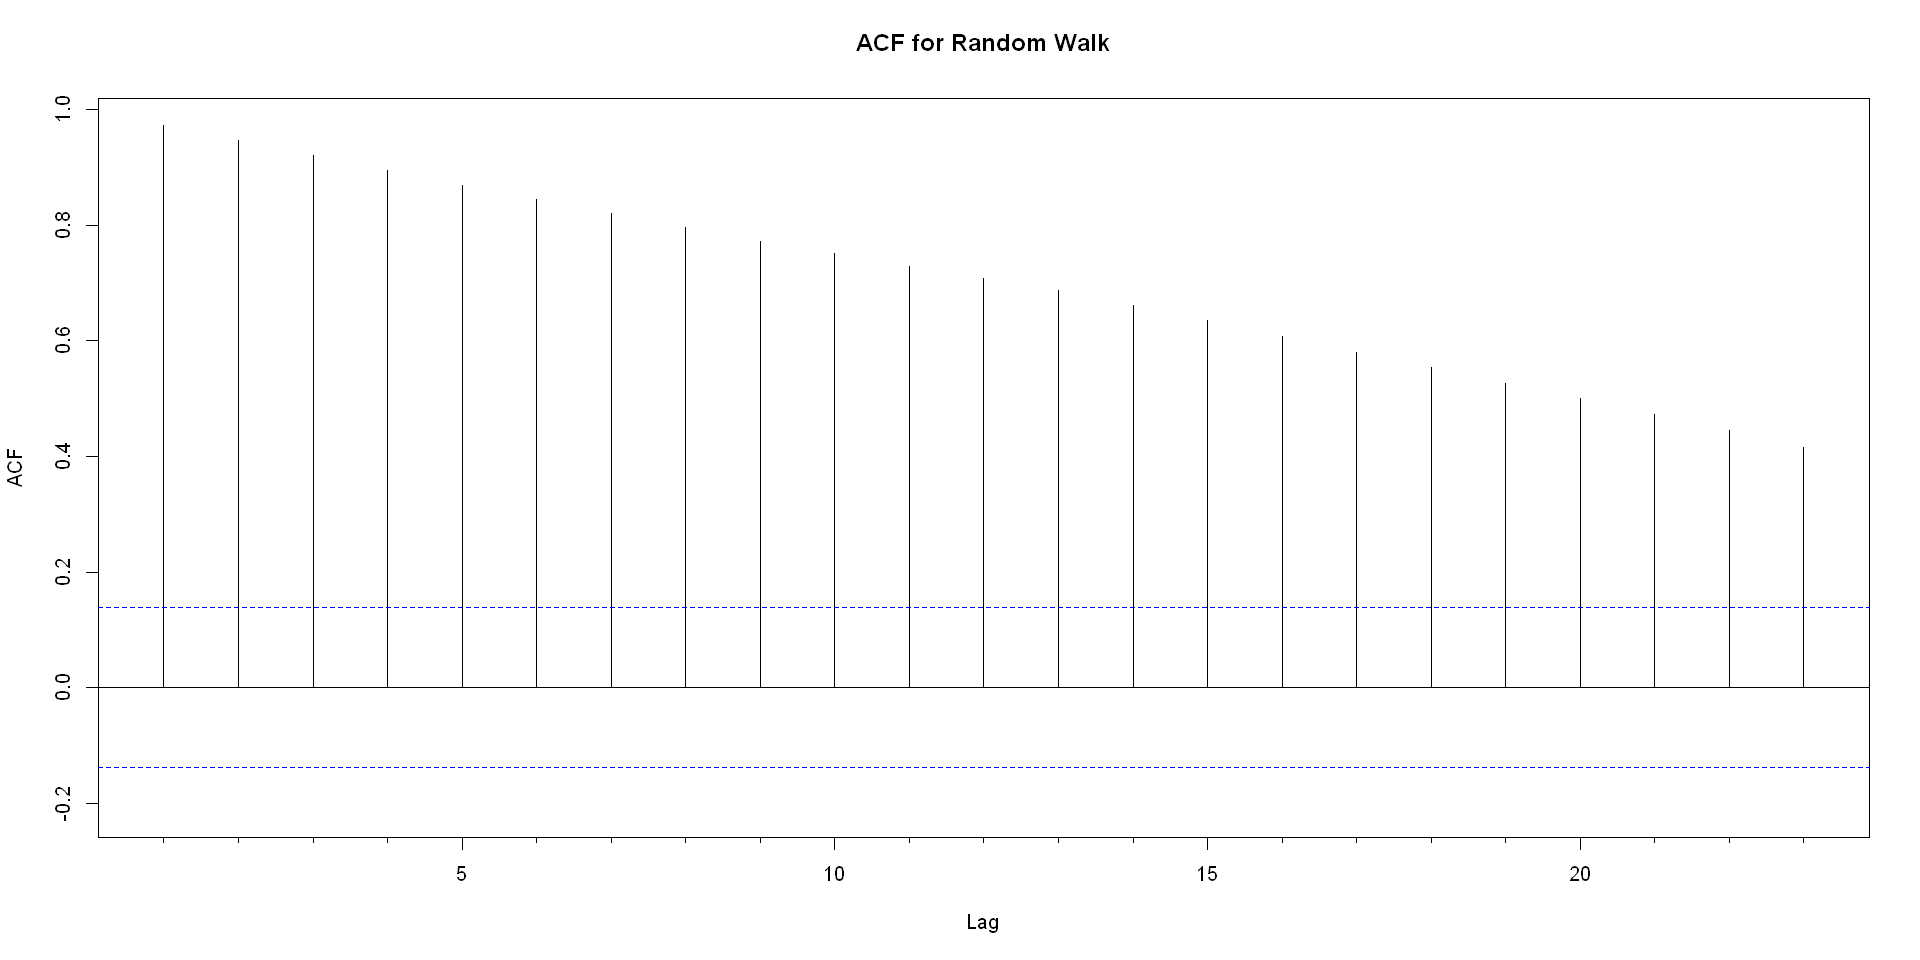

    NSWMetro        NSWNthCo        NSWSthCo        NSWSthIn    
 Min.   :4.699   Min.   :4.677   Min.   :1.261   Min.   :1.770  
 1st Qu.:6.028   1st Qu.:5.454   1st Qu.:2.038   1st Qu.:2.324  
 Median :6.628   Median :6.005   Median :2.457   Median :2.554  
 Mean   :6.721   Mean   :6.455   Mean   :2.912   Mean   :2.586  
 3rd Qu.:7.230   3rd Qu.:7.440   3rd Qu.:3.610   3rd Qu.:2.786  
 Max.   :9.580   Max.   :9.945   Max.   :5.818   Max.   :3.618  
    NSWNthIn        QLDMetro         QLDCntrl        QLDNthCo    
 Min.   :2.528   Min.   : 7.787   Min.   :1.970   Min.   :1.643  
 1st Qu.:2.834   1st Qu.: 9.677   1st Qu.:4.040   1st Qu.:2.709  
 Median :2.982   Median :10.695   Median :4.337   Median :3.227  
 Mean   :3.097   Mean   :10.621   Mean   :4.634   Mean   :3.542  
 3rd Qu.:3.369   3rd Qu.:11.439   3rd Qu.:5.166   3rd Qu.:4.260  
 Max.   :3.928   Max.   :14.290   Max.   :6.826   Max.   :6.530  
    SAUMetro        SAUCoast         SAUInner         VICMetro    
 Min.   :1.543  

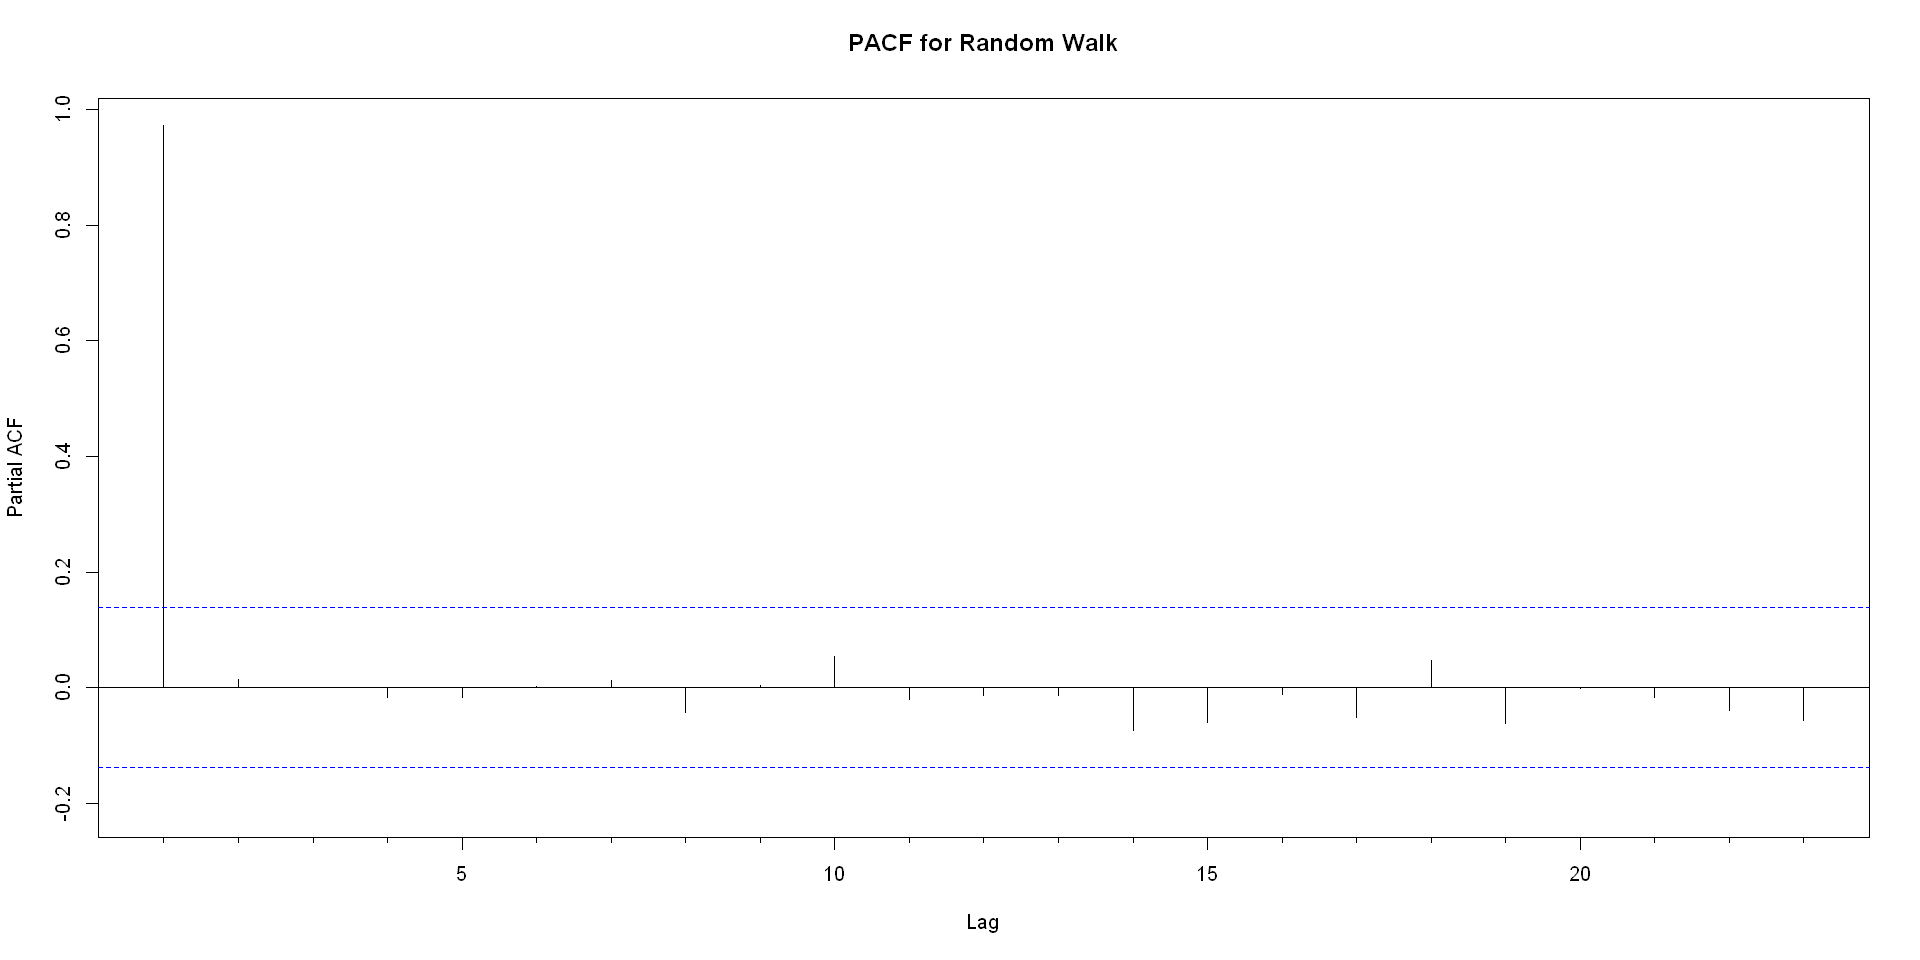

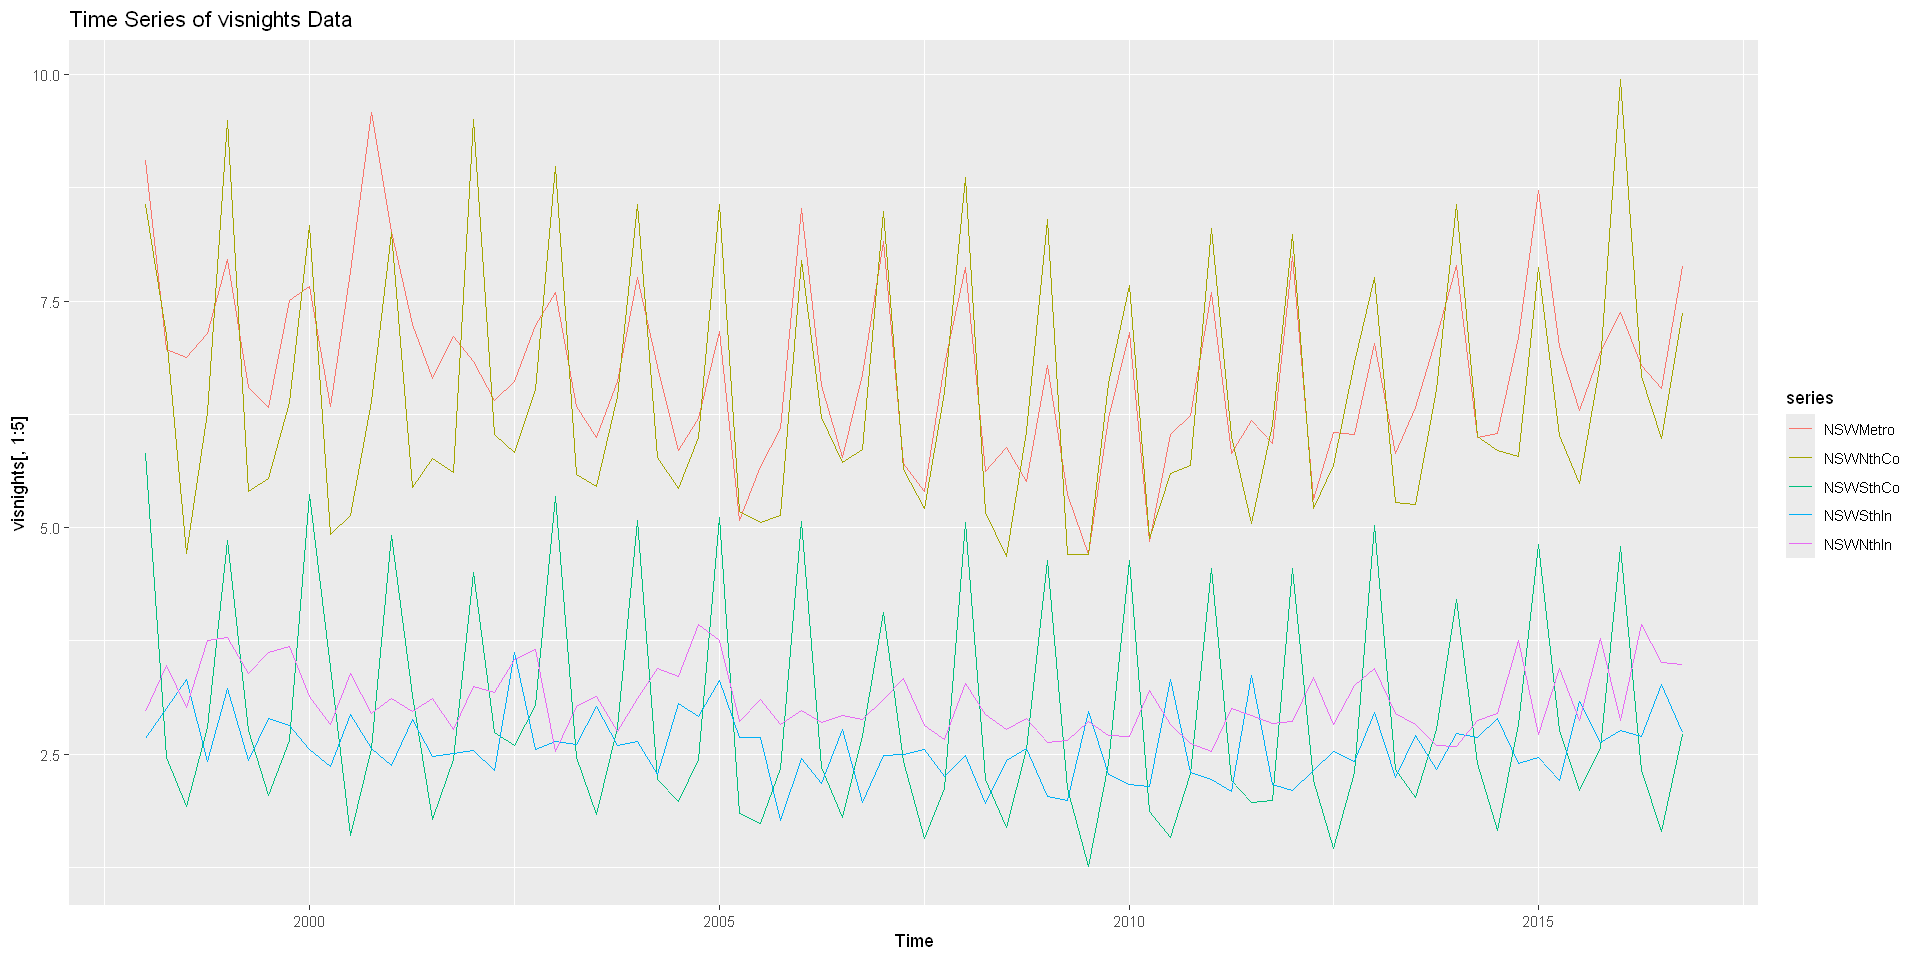

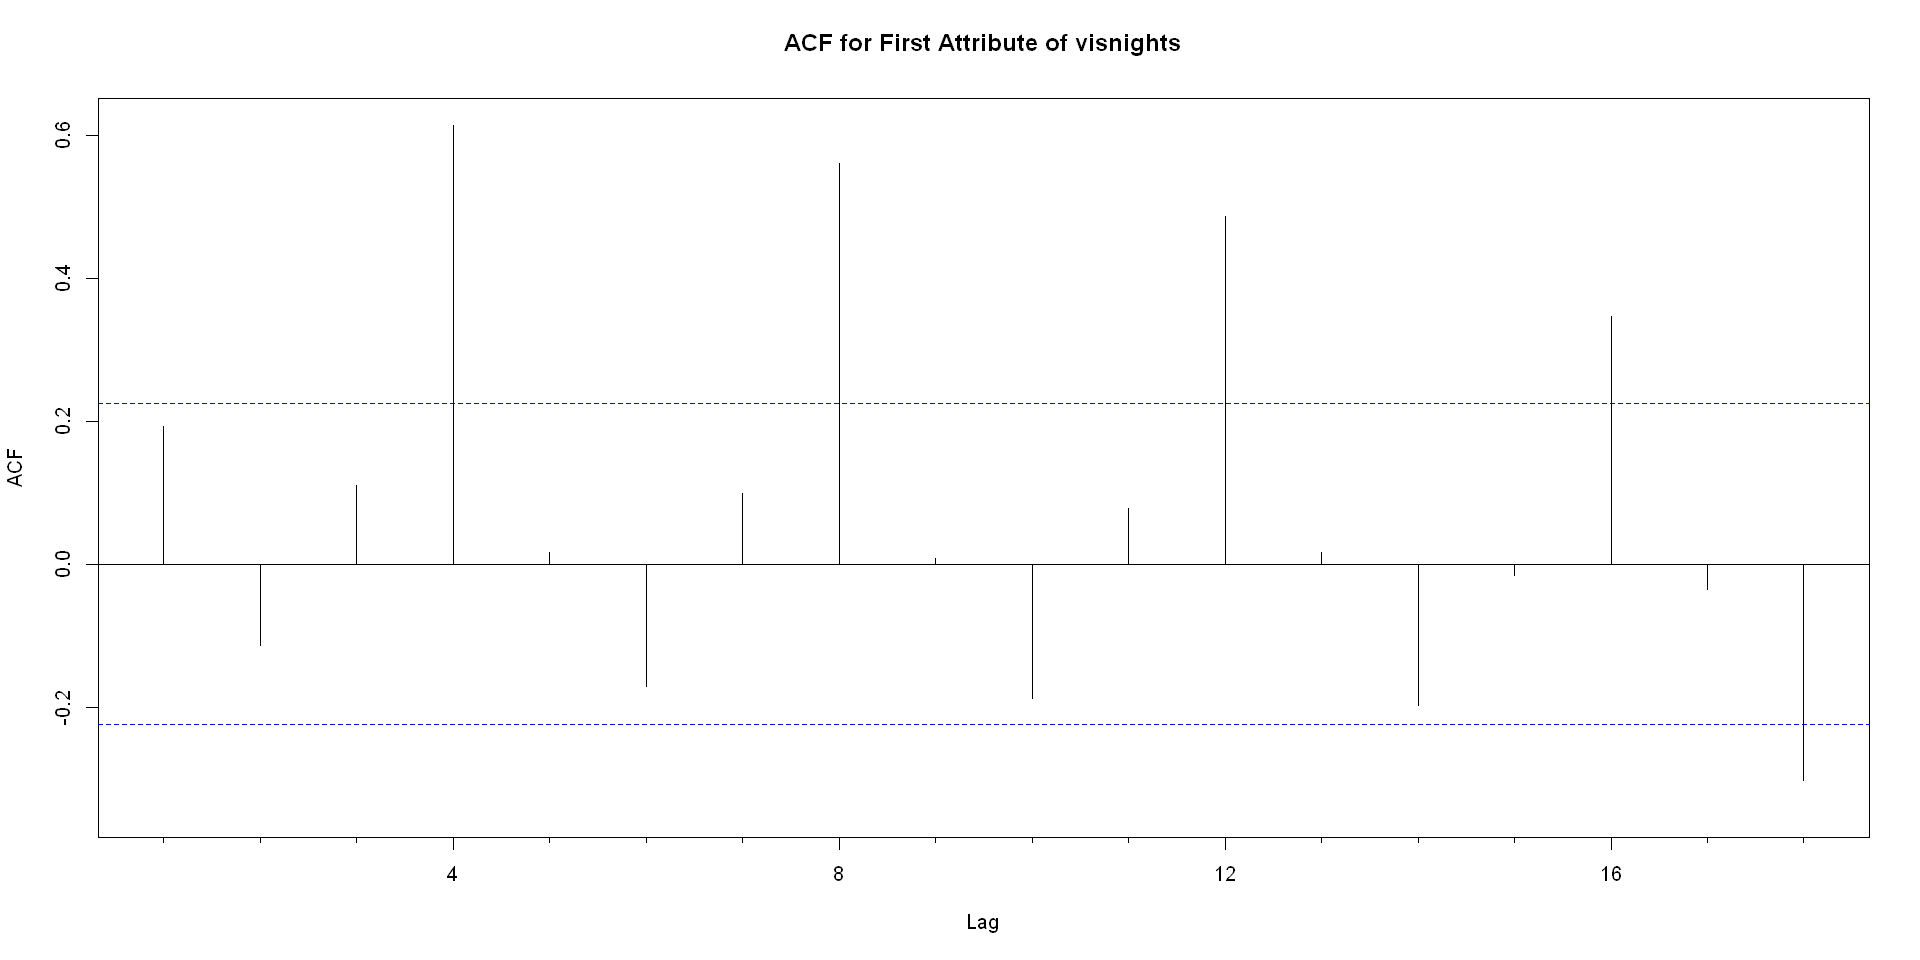

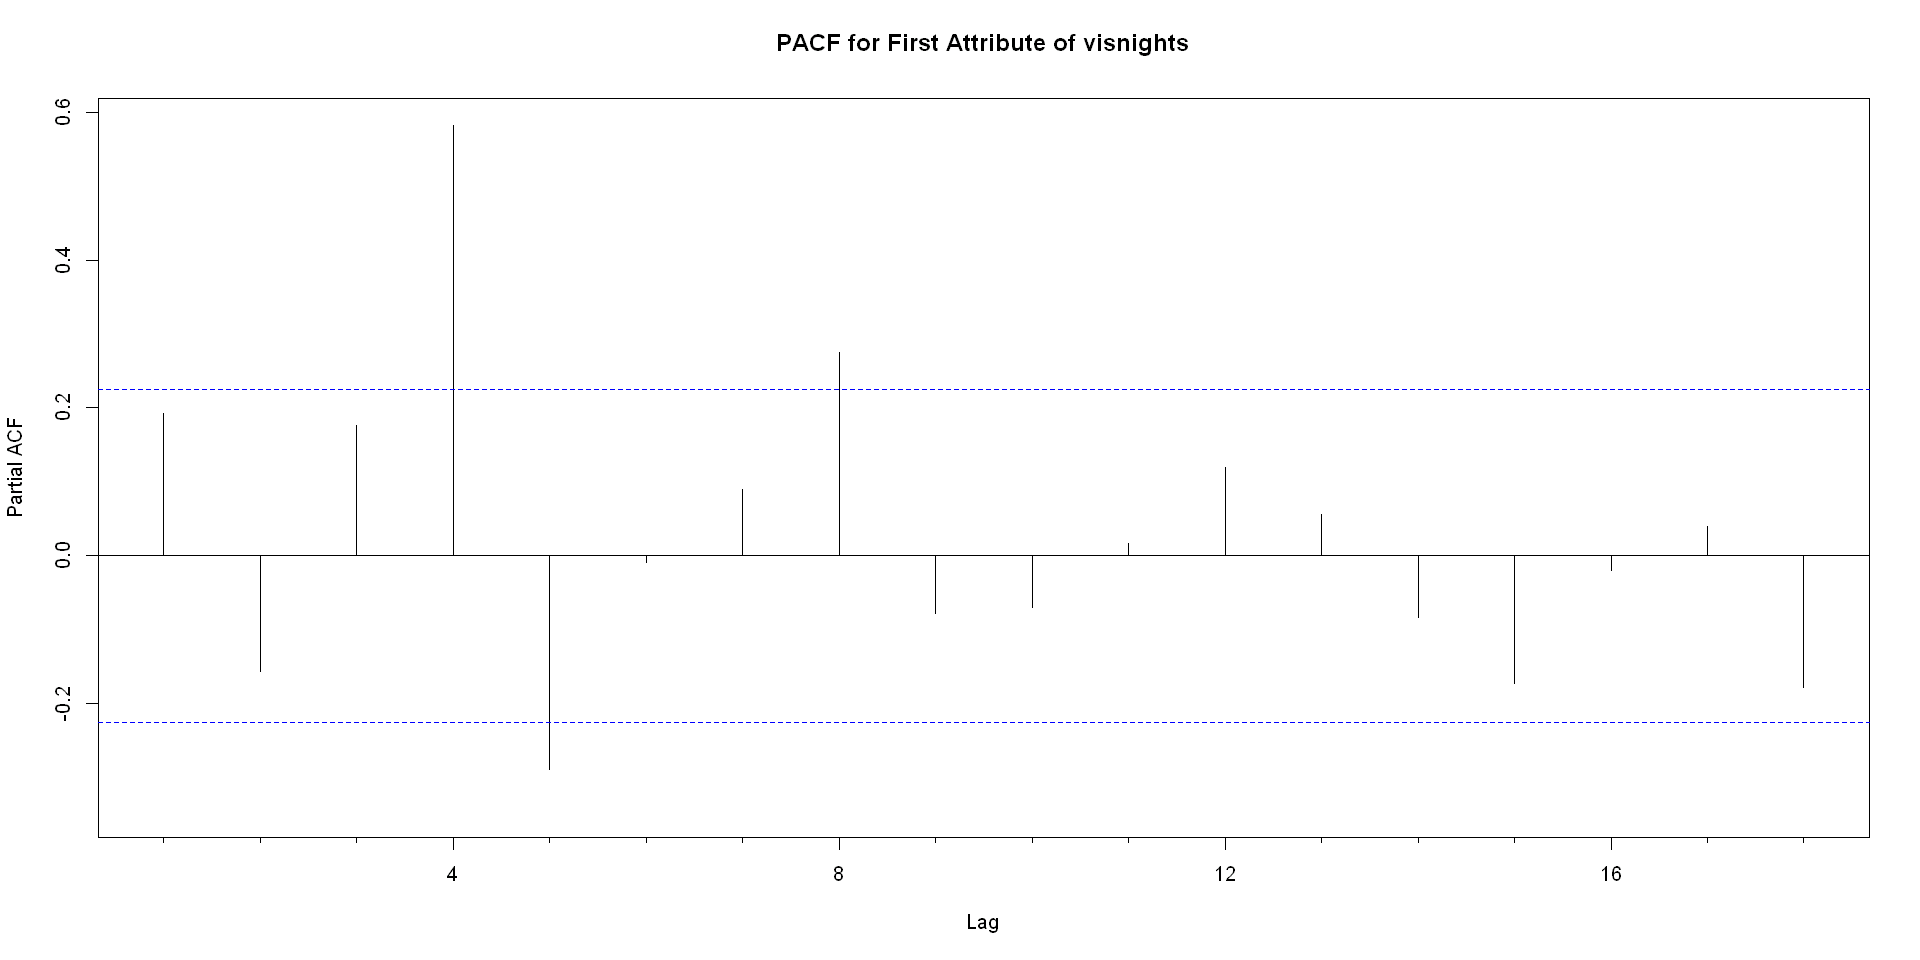

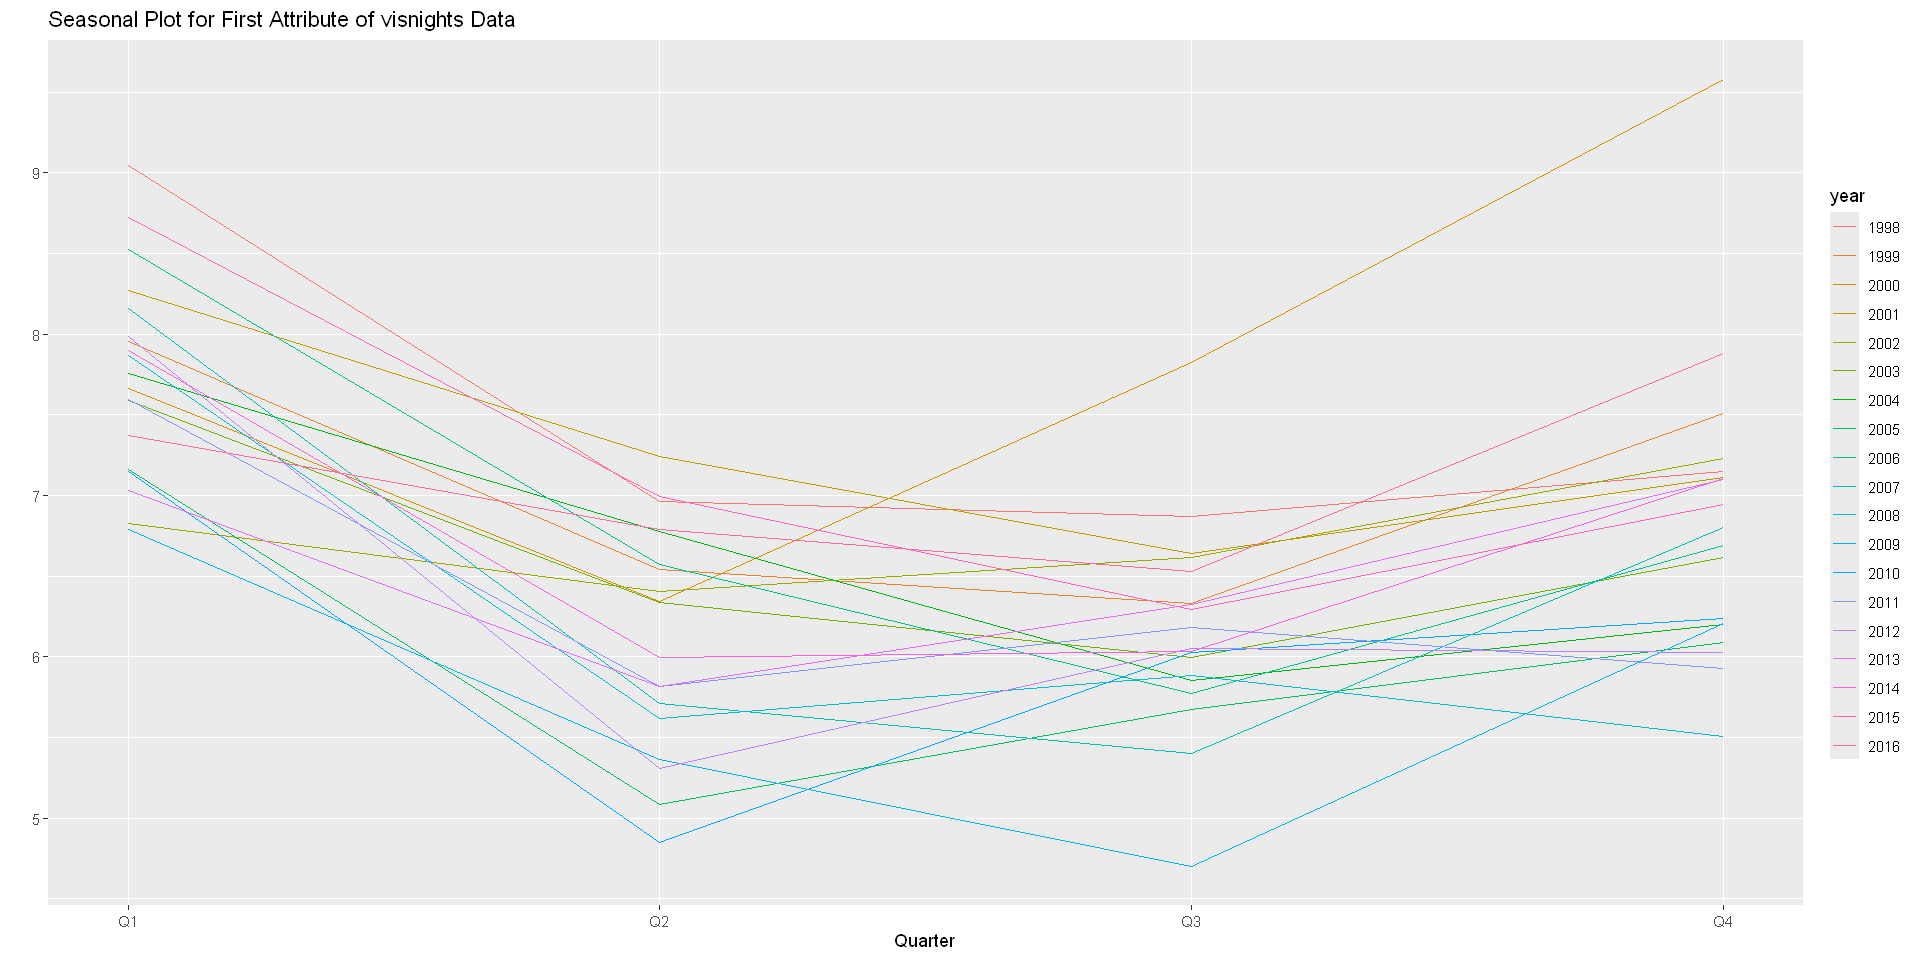

In [3]:
# Ustawienie szerokości okna wykresu
options(repr.plot.width = 16, repr.plot.height = 8)

# Wczytanie bibliotek
library(forecast)
library(fpp2)

## 1. Analiza autokorelacji i sezonowości dla danych qcement i ozonet_airquality
data(qcement)
Acf(qcement, lag.max = 30, main = "Autocorrelation of qcement Data")
Pacf(qcement, lag.max = 30, main = "Partial Autocorrelation of qcement Data")
ggseasonplot(qcement, main = "Seasonal Plot of qcement Data")

data("airquality")
ozone_airquality <- na.omit(airquality[62:153, c("Ozone", "Temp")])
ozonet_ts <- ts(ozone_airquality, start=c(1973, 62), frequency=365)
Acf(ozonet_ts, lag.max = 30, main = "Autocorrelation of Ozone and Temperature Data")
Pacf(ozonet_ts, lag.max = 30, main = "Partial Autocorrelation of Ozone and Temperature Data")
if (length(unique(cycle(ozonet_ts))) == max(cycle(ozonet_ts))) {
  ggseasonplot(ozonet_ts, main = "Seasonal Plot of Ozone and Temperature Data")
}

## 2. Symulacje szeregów czasowych
set.seed(123)
ma_process <- arima.sim(n = 200, model = list(ma = -0.9), mean = 5)
ar_process <- arima.sim(n = 200, model = list(ar = 0.9), mean = -1)
random_walk <- cumsum(rnorm(200))
plot.ts(ma_process, main = "Moving Average Process (MA)")
plot.ts(ar_process, main = "Autoregressive Process (AR)")
plot.ts(random_walk, main = "Random Walk Process")
Acf(ma_process, main = "ACF for MA Process")
Pacf(ma_process, main = "PACF for MA Process")
Acf(ar_process, main = "ACF for AR Process")
Pacf(ar_process, main = "PACF for AR Process")
Acf(random_walk, main = "ACF for Random Walk")
Pacf(random_walk, main = "PACF for Random Walk")

## 3. Analiza danych visnights
data(visnights, package = "fpp2")
summary(visnights)
autoplot(visnights[, 1:5]) + ggtitle("Time Series of visnights Data")
Acf(visnights[, 1], main = "ACF for First Attribute of visnights")
Pacf(visnights[, 1], main = "PACF for First Attribute of visnights")
ggseasonplot(visnights[, 1], main = "Seasonal Plot for First Attribute of visnights Data")
